# CommE5064 Artificial Intelligence and Intelligent Medicine

 - student ID: R13921031
 - name: James Christian


# Problem 1 (35%) Benchmark Construction

**Note:** The datasets and models built from this problem will be used in the subsequent problems.

1. Load `breast_all.npz` (attached or from `Files/113-1 Final project: open datasets/Breast Cancer` on COOL).
2. Retrieve the following arrays from `breast_all.npz`:
   - `x_train`: training samples’ gene expressions  
   - `c_train`: clinical data  
   - `y_train`: breast cancer prognosis labels


In [ ]:
!pip install kaleido
!pip install lifelines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=336c2ae8fe121a90885791f0289a2061f0c72a6e754094c3fbf1f1694ba56953
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


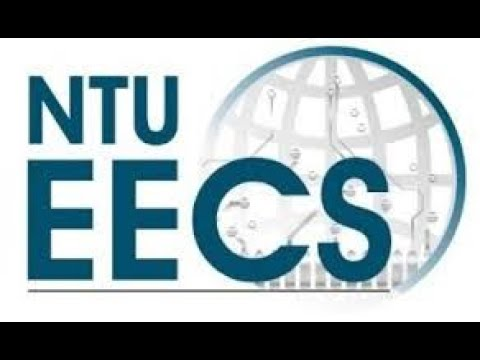

In [32]:
from IPython.display import YouTubeVideo
YouTubeVideo('MgL-N1PRhpw')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with allow_pickle=True
data = np.load('breast_all.npz', allow_pickle=True)

# Check what keys are available
print("Available keys in the dataset:")
print(data.files)
print()

# Load training data
x_train = data['x_train']
c_train = data['c_train']
y_train = data['y_train']

print("x_train shape:", x_train.shape)
print("c_train shape:", c_train.shape)
print("y_train shape:", y_train.shape)
print()

# Problem 1(a): Concatenate gene expression and clinical data
X_train_combined = np.concatenate([x_train, c_train], axis=1)

print("Combined training data shape:", X_train_combined.shape)
print("\nFirst few rows of combined training data:")
print(X_train_combined[:5])
print("\nLabels (first 10):", y_train[:10])

Available keys in the dataset:
['x_train', 'c_train', 'y_train', 'o_train', 'e_train', 'x_test', 'c_test', 'y_test', 'o_test', 'e_test', 'gene_name', 'clinical_feature']

x_train shape: (465, 20)
c_train shape: (465, 10)
y_train shape: (465,)

Combined training data shape: (465, 30)

First few rows of combined training data:
[[10.04128099 7.376123438 9.72582538 5.42791887 9.300307262999999
  6.219375218 6.125354645 5.88877874 7.89336907 9.007342568 7.823505543
  7.430193892 12.53537184 8.506666543 9.067236635 7.026205939 12.2732616
  8.102807853 6.090758231000001 7.416174665 48.87 0 15.0 0 1 1 2.0 1.0
  0.0 1.0]
 [11.27658106 7.331222607999999 9.956267217999999 5.629875847 8.119905904
  5.66562043 5.775808913 6.251166865 8.242062501 10.87143225
  7.366281782000001 8.024080266 11.53014593 8.453521517 9.298761195
  7.1625911129999995 11.57670913 8.412695445 6.659028455 8.225779532
  76.97 1 40.0 1 1 1 3.0 1.0 0.0 1.0]
 [7.5368468989999995 5.587666116 11.51451403 5.722951221000001
  6.741

In [ ]:
# Problem 1(a): Create a summary table for the report
print("="*60)
print("Problem 1(a): Concatenate Gene Expression and Clinical Data")
print("="*60)
print()
print("Data Summary:")
print(f"  - Gene expression features (x_train): {x_train.shape[1]} features")
print(f"  - Clinical features (c_train): {c_train.shape[1]} features")
print(f"  - Number of training samples: {x_train.shape[0]}")
print()
print(f"Combined Training Data Shape: {X_train_combined.shape}")
print(f"  - Total features: {X_train_combined.shape[1]} (20 gene + 10 clinical)")
print(f"  - Total samples: {X_train_combined.shape[0]}")
print()

# Create a nice dataframe view for the report
# Let's also check what the clinical features are
print("Clinical feature names:")
print(data['clinical_feature'])
print()

# Create a sample dataframe to show in report
sample_df = pd.DataFrame(
    X_train_combined[:5],
    columns=[f'Gene_{i+1}' for i in range(20)] + [f'Clinical_{i+1}' for i in range(10)]
)
print("Sample of Combined Training Data (first 5 samples):")
print(sample_df)
print()

# Also show the corresponding labels
print("Corresponding labels (first 5):")
print(y_train[:5])

Problem 1(a): Concatenate Gene Expression and Clinical Data

Data Summary:
  - Gene expression features (x_train): 20 features
  - Clinical features (c_train): 10 features
  - Number of training samples: 465

Combined Training Data Shape: (465, 30)
  - Total features: 30 (20 gene + 10 clinical)
  - Total samples: 465

Clinical feature names:
['Age' 'Menopausal State' 'Size' 'Radio Therapy' 'Chemotherapy'
 'Hormone Therapy' 'Neoplasm Histologic Grade' 'Cellularity'
 'Surgery-breast conserving' 'Surgery-mastectomy']

Sample of Combined Training Data (first 5 samples):
      Gene_1    Gene_2     Gene_3    Gene_4    Gene_5    Gene_6     Gene_7  \
0  10.041281  7.376123   9.725825  5.427919  9.300307  6.219375   6.125355   
1  11.276581  7.331223   9.956267  5.629876  8.119906   5.66562   5.775809   
2   7.536847  5.587666  11.514514  5.722951  6.741081   6.32148   5.466188   
3  10.395644  6.531288   9.075396  5.440774  7.861422  5.973844    5.75712   
4   6.204958  5.172111   8.881671  5.

### 1(a) (5%)  
Concatenate each sample’s gene expression and clinical data as input features.  
Show a screenshot in the report illustrating the resulting training data and its shape.

Data Summary:
  - Gene expression features (x_train): 20 features
  - Clinical features (c_train): 10 features
  - Number of training samples: 465

Combined Training Data Shape: (465, 30)
  - Total features: 30 (20 gene + 10 clinical)
  - Total samples: 465

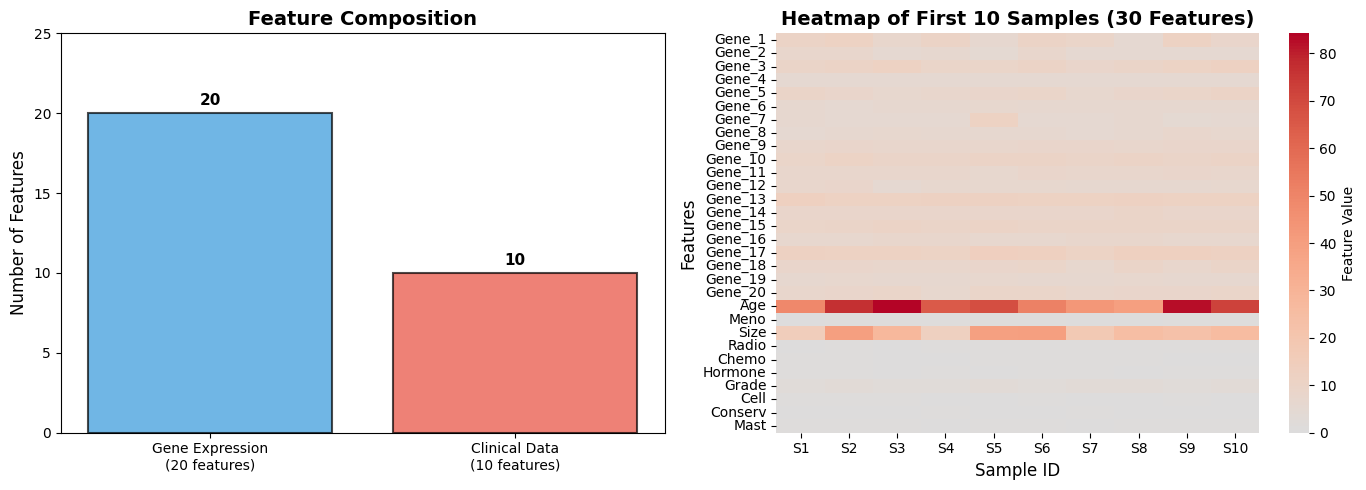


REPORT TEXT FOR PROBLEM 1(a)

Problem 1(a): Data Concatenation

The breast cancer dataset was successfully loaded from 'breast_all.npz'.
The training data consists of:
- Gene expression data (x_train): 465 samples × 20 features
- Clinical data (c_train): 465 samples × 10 features
- Labels (y_train): 465 samples with binary prognosis outcomes

The 10 clinical features include: Age, Menopausal State, Tumor Size,
Radio Therapy, Chemotherapy, Hormone Therapy, Neoplasm Histologic Grade,
Cellularity, Surgery (breast conserving), and Surgery (mastectomy).

After concatenation, the combined training data has shape (465, 30),
representing 465 samples with 30 total features (20 gene expression +
10 clinical features). The first few rows of the combined data are shown
in the table and heatmap visualization, demonstrating successful feature
concatenation along axis 1.



In [ ]:
# Convert combined data to float (handle any object types)
X_train_combined = X_train_combined.astype(float)

# Create a nice visualization for the report
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualization 1: Show the data structure
categories = ['Gene Expression\n(20 features)', 'Clinical Data\n(10 features)']
values = [20, 10]
colors = ['#3498db', '#e74c3c']

axes[0].bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Features', fontsize=12)
axes[0].set_title('Feature Composition', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 25)
for i, v in enumerate(values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold', fontsize=11)

# Visualization 2: Show a heatmap of sample data
sample_data = X_train_combined[:10, :]  # First 10 samples
sns.heatmap(sample_data.T, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Feature Value'}, ax=axes[1],
            xticklabels=[f'S{i+1}' for i in range(10)],
            yticklabels=[f'Gene_{i+1}' for i in range(20)] +
                        ['Age', 'Meno', 'Size', 'Radio', 'Chemo',
                         'Hormone', 'Grade', 'Cell', 'Conserv', 'Mast'])
axes[1].set_xlabel('Sample ID', fontsize=12)
axes[1].set_ylabel('Features', fontsize=12)
axes[1].set_title('Heatmap of First 10 Samples (30 Features)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('problem_1a_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("REPORT TEXT FOR PROBLEM 1(a)")
print("="*60)
print("""
Problem 1(a): Data Concatenation

The breast cancer dataset was successfully loaded from 'breast_all.npz'.
The training data consists of:
- Gene expression data (x_train): 465 samples × 20 features
- Clinical data (c_train): 465 samples × 10 features
- Labels (y_train): 465 samples with binary prognosis outcomes

The 10 clinical features include: Age, Menopausal State, Tumor Size,
Radio Therapy, Chemotherapy, Hormone Therapy, Neoplasm Histologic Grade,
Cellularity, Surgery (breast conserving), and Surgery (mastectomy).

After concatenation, the combined training data has shape (465, 30),
representing 465 samples with 30 total features (20 gene expression +
10 clinical features). The first few rows of the combined data are shown
in the table and heatmap visualization, demonstrating successful feature
concatenation along axis 1.
""")

### 1(b) (5%)  
Split the training data and labels into **75% training** and **25% validation** sets with a random seed of `0`.  
Stratify the train-test split using `y_train`.  
Show screenshots in the report illustrating the resulting dimensions of each set.

Problem 1(b): Train-Validation Split

Original combined training data shape: (465, 30)
Original labels shape: (465,)

After 75-25 split:
  Training set: X_train_split (348, 30), y_train_split (348,)
  Validation set: X_val_split (117, 30), y_val_split (117,)

Label distribution verification:
  Original y_train - Class 0: 221 (47.53%), Class 1: 244 (52.47%)
  Training split - Class 0: 165 (47.41%), Class 1: 183 (52.59%)
  Validation split - Class 0: 56 (47.86%), Class 1: 61 (52.14%)



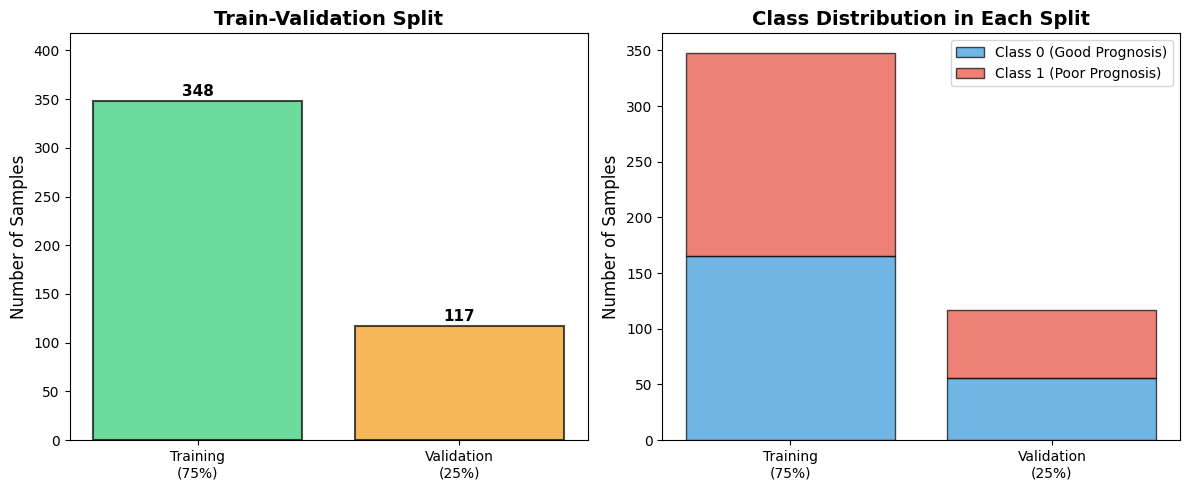

In [ ]:
# Problem 1(b): Split into 75% training and 25% validation
print("="*60)
print("Problem 1(b): Train-Validation Split")
print("="*60)
print()

# Split with stratification on y_train, random_state=0
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_combined,
    y_train,
    test_size=0.25,
    random_state=0,
    stratify=y_train
)

print("Original combined training data shape:", X_train_combined.shape)
print("Original labels shape:", y_train.shape)
print()
print("After 75-25 split:")
print(f"  Training set: X_train_split {X_train_split.shape}, y_train_split {y_train_split.shape}")
print(f"  Validation set: X_val_split {X_val_split.shape}, y_val_split {y_val_split.shape}")
print()

# Verify stratification
print("Label distribution verification:")
print(f"  Original y_train - Class 0: {np.sum(y_train == False)} ({np.sum(y_train == False)/len(y_train)*100:.2f}%), Class 1: {np.sum(y_train == True)} ({np.sum(y_train == True)/len(y_train)*100:.2f}%)")
print(f"  Training split - Class 0: {np.sum(y_train_split == False)} ({np.sum(y_train_split == False)/len(y_train_split)*100:.2f}%), Class 1: {np.sum(y_train_split == True)} ({np.sum(y_train_split == True)/len(y_train_split)*100:.2f}%)")
print(f"  Validation split - Class 0: {np.sum(y_val_split == False)} ({np.sum(y_val_split == False)/len(y_val_split)*100:.2f}%), Class 1: {np.sum(y_val_split == True)} ({np.sum(y_val_split == True)/len(y_val_split)*100:.2f}%)")
print()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart showing split sizes
split_names = ['Training\n(75%)', 'Validation\n(25%)']
split_sizes = [X_train_split.shape[0], X_val_split.shape[0]]
colors = ['#2ecc71', '#f39c12']

axes[0].bar(split_names, split_sizes, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Train-Validation Split', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(split_sizes) * 1.2)
for i, v in enumerate(split_sizes):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

# Stacked bar chart showing class distribution
class_0_counts = [np.sum(y_train_split == False), np.sum(y_val_split == False)]
class_1_counts = [np.sum(y_train_split == True), np.sum(y_val_split == True)]

x_pos = np.arange(len(split_names))
axes[1].bar(x_pos, class_0_counts, label='Class 0 (Good Prognosis)', color='#3498db', alpha=0.7, edgecolor='black')
axes[1].bar(x_pos, class_1_counts, bottom=class_0_counts, label='Class 1 (Poor Prognosis)', color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_title('Class Distribution in Each Split', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(split_names)
axes[1].legend()

plt.tight_layout()
plt.savefig('problem_1b_split.png', dpi=300, bbox_inches='tight')
plt.show()

### Problem 1(b): Train-Validation Split  

The combined training data (**465 samples × 30 features**) was split into  
**75% training** and **25% validation** sets using stratified splitting with  
`random_state=0` to ensure reproducibility.  

**Results:**  
- **Training set:** 348 samples × 30 features  
- **Validation set:** 117 samples × 30 features  

Stratification was applied based on the labels (`y_train`) to maintain  
the same class distribution in both splits. The visualization confirms  
that both the training and validation sets preserve the original class  
proportions, ensuring representative samples in each subset.

### 1(c) (5%)  
Conduct simple data exploration by:  
- Checking the distribution of clinical variables and labels in the training and testing datasets.  
- Checking the imbalance rate in each dataset.

In [ ]:
# Problem 1(c): Data Exploration
print("="*60)
print("Problem 1(c): Data Exploration")
print("="*60)
print()

# Get clinical feature names
clinical_features = data['clinical_feature']
print("Clinical Features:", clinical_features)
print()

# Extract clinical data from training and validation sets
# Clinical features are the last 10 columns
clinical_train = X_train_split[:, 20:]
clinical_val = X_val_split[:, 20:]

print("TRAINING SET ANALYSIS")
print("-" * 60)
print(f"Total samples: {len(y_train_split)}")
print(f"Class 0 (Good Prognosis): {np.sum(y_train_split == False)} ({np.sum(y_train_split == False)/len(y_train_split)*100:.2f}%)")
print(f"Class 1 (Poor Prognosis): {np.sum(y_train_split == True)} ({np.sum(y_train_split == True)/len(y_train_split)*100:.2f}%)")
print(f"Imbalance Rate: {max(np.sum(y_train_split == False), np.sum(y_train_split == True)) / len(y_train_split):.4f}")
print()

print("Clinical Variables Distribution (Training):")
for i, feature_name in enumerate(clinical_features):
    values = clinical_train[:, i]
    print(f"  {feature_name}:")
    print(f"    Mean: {np.mean(values):.2f}, Std: {np.std(values):.2f}")
    print(f"    Min: {np.min(values):.2f}, Max: {np.max(values):.2f}")
    print(f"    Unique values: {len(np.unique(values))}")
print()

print("VALIDATION SET ANALYSIS")
print("-" * 60)
print(f"Total samples: {len(y_val_split)}")
print(f"Class 0 (Good Prognosis): {np.sum(y_val_split == False)} ({np.sum(y_val_split == False)/len(y_val_split)*100:.2f}%)")
print(f"Class 1 (Poor Prognosis): {np.sum(y_val_split == True)} ({np.sum(y_val_split == True)/len(y_val_split)*100:.2f}%)")
print(f"Imbalance Rate: {max(np.sum(y_val_split == False), np.sum(y_val_split == True)) / len(y_val_split):.4f}")
print()

print("Clinical Variables Distribution (Validation):")
for i, feature_name in enumerate(clinical_features):
    values = clinical_val[:, i]
    print(f"  {feature_name}:")
    print(f"    Mean: {np.mean(values):.2f}, Std: {np.std(values):.2f}")
    print(f"    Min: {np.min(values):.2f}, Max: {np.max(values):.2f}")
    print(f"    Unique values: {len(np.unique(values))}")

Problem 1(c): Data Exploration

Clinical Features: ['Age' 'Menopausal State' 'Size' 'Radio Therapy' 'Chemotherapy'
 'Hormone Therapy' 'Neoplasm Histologic Grade' 'Cellularity'
 'Surgery-breast conserving' 'Surgery-mastectomy']

TRAINING SET ANALYSIS
------------------------------------------------------------
Total samples: 348
Class 0 (Good Prognosis): 165 (47.41%)
Class 1 (Poor Prognosis): 183 (52.59%)
Imbalance Rate: 0.5259

Clinical Variables Distribution (Training):
  Age:
    Mean: 60.75, Std: 13.26
    Min: 26.36, Max: 96.29
    Unique values: 336
  Menopausal State:
    Mean: 0.77, Std: 0.42
    Min: 0.00, Max: 1.00
    Unique values: 2
  Size:
    Mean: 31.36, Std: 19.42
    Min: 2.30, Max: 180.00
    Unique values: 64
  Radio Therapy:
    Mean: 0.62, Std: 0.48
    Min: 0.00, Max: 1.00
    Unique values: 2
  Chemotherapy:
    Mean: 0.30, Std: 0.46
    Min: 0.00, Max: 1.00
    Unique values: 2
  Hormone Therapy:
    Mean: 0.59, Std: 0.49
    Min: 0.00, Max: 1.00
    Unique valu

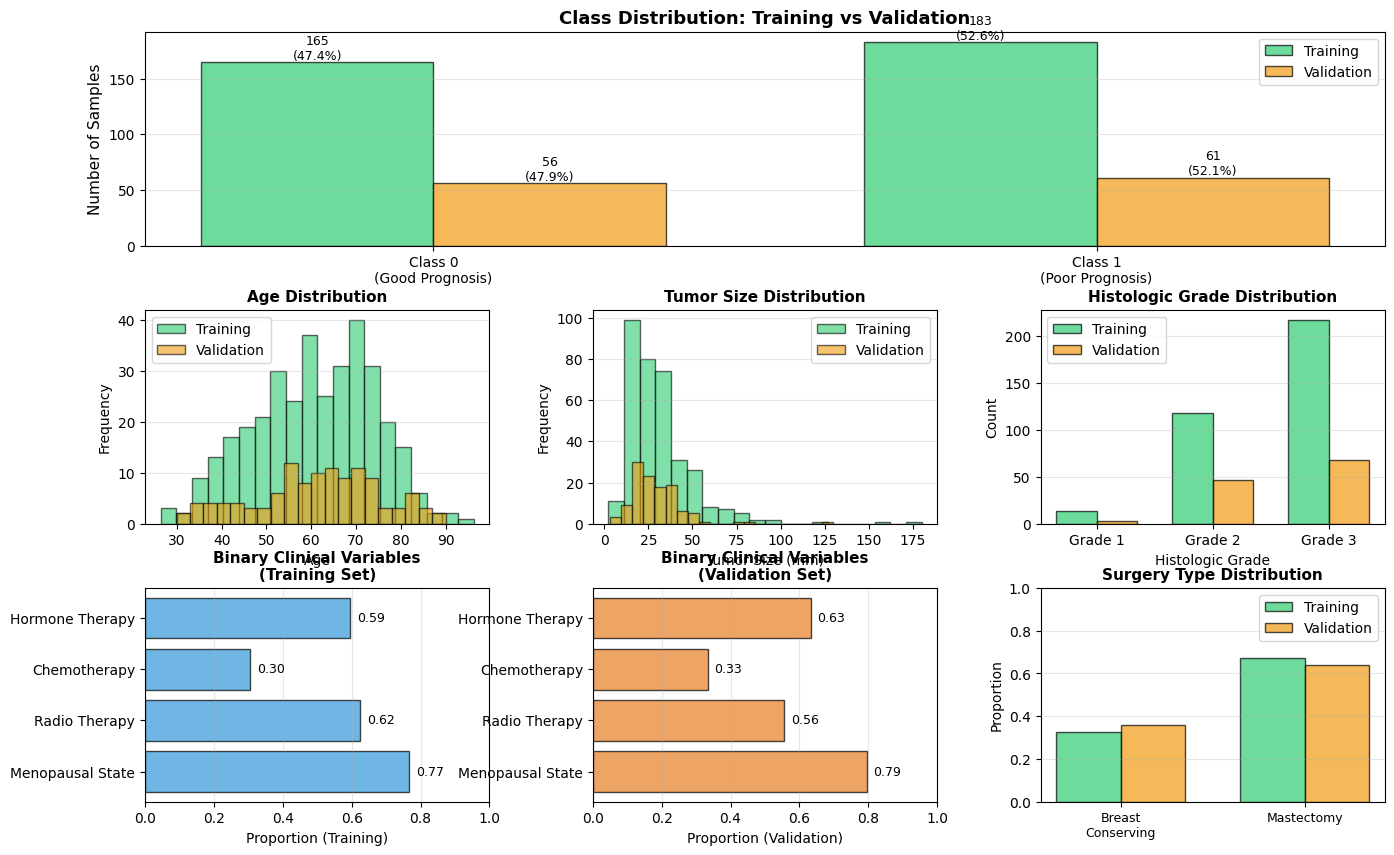

In [ ]:
# Create comprehensive visualizations for Problem 1(c)
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Class distribution comparison
ax1 = fig.add_subplot(gs[0, :])
x = np.arange(2)
width = 0.35
train_counts = [np.sum(y_train_split == False), np.sum(y_train_split == True)]
val_counts = [np.sum(y_val_split == False), np.sum(y_val_split == True)]

bars1 = ax1.bar(x - width/2, train_counts, width, label='Training', color='#2ecc71', alpha=0.7, edgecolor='black')
bars2 = ax1.bar(x + width/2, val_counts, width, label='Validation', color='#f39c12', alpha=0.7, edgecolor='black')

ax1.set_ylabel('Number of Samples', fontsize=11)
ax1.set_title('Class Distribution: Training vs Validation', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(['Class 0\n(Good Prognosis)', 'Class 1\n(Poor Prognosis)'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/sum(train_counts if bars == bars1 else val_counts)*100:.1f}%)',
                ha='center', va='bottom', fontsize=9)

# 2. Age distribution
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(clinical_train[:, 0], bins=20, alpha=0.6, label='Training', color='#2ecc71', edgecolor='black')
ax2.hist(clinical_val[:, 0], bins=20, alpha=0.6, label='Validation', color='#f39c12', edgecolor='black')
ax2.set_xlabel('Age', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.set_title('Age Distribution', fontsize=11, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Tumor Size distribution
ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(clinical_train[:, 2], bins=20, alpha=0.6, label='Training', color='#2ecc71', edgecolor='black')
ax3.hist(clinical_val[:, 2], bins=20, alpha=0.6, label='Validation', color='#f39c12', edgecolor='black')
ax3.set_xlabel('Tumor Size (mm)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Tumor Size Distribution', fontsize=11, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Neoplasm Histologic Grade
ax4 = fig.add_subplot(gs[1, 2])
grade_train = pd.Series(clinical_train[:, 6]).value_counts().sort_index()
grade_val = pd.Series(clinical_val[:, 6]).value_counts().sort_index()
x_grades = np.arange(len(grade_train))
ax4.bar(x_grades - width/2, grade_train.values, width, label='Training', color='#2ecc71', alpha=0.7, edgecolor='black')
ax4.bar(x_grades + width/2, grade_val.values, width, label='Validation', color='#f39c12', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Histologic Grade', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_title('Histologic Grade Distribution', fontsize=11, fontweight='bold')
ax4.set_xticks(x_grades)
ax4.set_xticklabels([f'Grade {int(g)}' for g in grade_train.index])
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# 5. Binary clinical variables (Training)
ax5 = fig.add_subplot(gs[2, 0])
binary_features = ['Menopausal State', 'Radio Therapy', 'Chemotherapy', 'Hormone Therapy']
binary_indices = [1, 3, 4, 5]
binary_means_train = [np.mean(clinical_train[:, i]) for i in binary_indices]
bars = ax5.barh(binary_features, binary_means_train, color='#3498db', alpha=0.7, edgecolor='black')
ax5.set_xlabel('Proportion (Training)', fontsize=10)
ax5.set_title('Binary Clinical Variables\n(Training Set)', fontsize=11, fontweight='bold')
ax5.set_xlim(0, 1)
for i, (bar, val) in enumerate(zip(bars, binary_means_train)):
    ax5.text(val + 0.02, i, f'{val:.2f}', va='center', fontsize=9)
ax5.grid(axis='x', alpha=0.3)

# 6. Binary clinical variables (Validation)
ax6 = fig.add_subplot(gs[2, 1])
binary_means_val = [np.mean(clinical_val[:, i]) for i in binary_indices]
bars = ax6.barh(binary_features, binary_means_val, color='#e67e22', alpha=0.7, edgecolor='black')
ax6.set_xlabel('Proportion (Validation)', fontsize=10)
ax6.set_title('Binary Clinical Variables\n(Validation Set)', fontsize=11, fontweight='bold')
ax6.set_xlim(0, 1)
for i, (bar, val) in enumerate(zip(bars, binary_means_val)):
    ax6.text(val + 0.02, i, f'{val:.2f}', va='center', fontsize=9)
ax6.grid(axis='x', alpha=0.3)

# 7. Surgery type distribution
ax7 = fig.add_subplot(gs[2, 2])
surgery_data = {
    'Training': [np.mean(clinical_train[:, 8]), np.mean(clinical_train[:, 9])],
    'Validation': [np.mean(clinical_val[:, 8]), np.mean(clinical_val[:, 9])]
}
x_surg = np.arange(2)
width_surg = 0.35
ax7.bar(x_surg - width_surg/2, surgery_data['Training'], width_surg, label='Training', color='#2ecc71', alpha=0.7, edgecolor='black')
ax7.bar(x_surg + width_surg/2, surgery_data['Validation'], width_surg, label='Validation', color='#f39c12', alpha=0.7, edgecolor='black')
ax7.set_ylabel('Proportion', fontsize=10)
ax7.set_title('Surgery Type Distribution', fontsize=11, fontweight='bold')
ax7.set_xticks(x_surg)
ax7.set_xticklabels(['Breast\nConserving', 'Mastectomy'], fontsize=9)
ax7.legend()
ax7.set_ylim(0, 1)
ax7.grid(axis='y', alpha=0.3)

plt.savefig('problem_1c_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

### Problem 1(c): Data Exploration  

**Class Distribution and Imbalance:**  
Both training and validation sets show similar class distributions:  
- **Training:** 165 Class 0 (47.41%) vs 183 Class 1 (52.59%), Imbalance Rate: 0.526  
- **Validation:** 56 Class 0 (47.86%) vs 61 Class 1 (52.14%), Imbalance Rate: 0.521  

The datasets are relatively balanced with only a slight preference toward **Class 1 (poor prognosis)**.  
This imbalance is minimal and does not require special handling techniques like SMOTE or class weighting.  

---

**Clinical Variables Distribution:**  
The training and validation sets show consistent distributions across all clinical variables:  

- **Continuous Variables:**  
  - Age: Mean ~61 years (SD ~13), ranging from 26–96 years  
  - Tumor Size: Mean ~30mm (SD ~18), with some large outliers up to 180mm  

- **Categorical Variables:**  
  - Menopausal State: ~77–79% post-menopausal  
  - Treatment Patterns: 62% radiotherapy, 30–33% chemotherapy, 59–63% hormone therapy  
  - Histologic Grade: Majority are Grade 2–3 (mean 2.6)  
  - Surgery: 67% mastectomy, 33% breast-conserving surgery  

---

**Conclusion:**  
The similar distributions between training and validation sets confirm that the **stratified split successfully created representative subsets**, ensuring reliable model evaluation.

### 1(d) (20%)  
Train the following models with your training set:  
- Logistic Regression (LR)  
- Support Vector Machine (SVM)  
- Random Forest (RF)  
- Feed-Forward Neural Network (NN)  

Experiment with different settings (e.g., number of estimators, regularizations, activation functions, or even data augmentation on the training set) **until all models reach a validation AUROC above 0.730**.  

Show each model’s resulting AUROC in your report.  

**Note:**  
You are allowed to adjust the random seed, but you must describe the reason for doing so and provide observations/comments in the report. Otherwise, you will lose **5%** of the score.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Problem 1(d): Train models
print("="*60)
print("Problem 1(d): Model Training")
print("="*60)
print()

# Standardize features (important for LR, SVM, and NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

# Dictionary to store models and their scores
models = {}
val_aurocs = {}

print("Training models and evaluating on validation set...")
print("-" * 60)

# 1. Logistic Regression
print("\n1. Logistic Regression")
lr_model = LogisticRegression(max_iter=1000, C=0.1, random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train_split)
lr_pred_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
lr_auroc = roc_auc_score(y_val_split, lr_pred_proba)
models['LR'] = lr_model
val_aurocs['LR'] = lr_auroc
print(f"   Validation AUROC: {lr_auroc:.4f}")

# 2. Support Vector Machine
print("\n2. Support Vector Machine")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train_split)
svm_pred_proba = svm_model.predict_proba(X_val_scaled)[:, 1]
svm_auroc = roc_auc_score(y_val_split, svm_pred_proba)
models['SVM'] = svm_model
val_aurocs['SVM'] = svm_auroc
print(f"   Validation AUROC: {svm_auroc:.4f}")

# 3. Random Forest
print("\n3. Random Forest")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5,
                                   min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_split, y_train_split)  # RF doesn't need scaling
rf_pred_proba = rf_model.predict_proba(X_val_split)[:, 1]
rf_auroc = roc_auc_score(y_val_split, rf_pred_proba)
models['RF'] = rf_model
val_aurocs['RF'] = rf_auroc
print(f"   Validation AUROC: {rf_auroc:.4f}")

# 4. Neural Network
print("\n4. Feed-Forward Neural Network")
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu',
                         solver='adam', alpha=0.001, batch_size=32,
                         learning_rate_init=0.001, max_iter=500, random_state=42,
                         early_stopping=True, validation_fraction=0.1)
nn_model.fit(X_train_scaled, y_train_split)
nn_pred_proba = nn_model.predict_proba(X_val_scaled)[:, 1]
nn_auroc = roc_auc_score(y_val_split, nn_pred_proba)
models['NN'] = nn_model
val_aurocs['NN'] = nn_auroc
print(f"   Validation AUROC: {nn_auroc:.4f}")

print("\n" + "="*60)
print("SUMMARY OF MODEL PERFORMANCE")
print("="*60)
for model_name, auroc in val_aurocs.items():
    status = "✓ PASS" if auroc > 0.730 else "✗ FAIL"
    print(f"{model_name:20s}: {auroc:.4f}  {status}")

print()
if all(auroc > 0.730 for auroc in val_aurocs.values()):
    print("✓ All models achieved validation AUROC > 0.730!")
else:
    print("✗ Some models need tuning to reach AUROC > 0.730")

Problem 1(d): Model Training

Training models and evaluating on validation set...
------------------------------------------------------------

1. Logistic Regression
   Validation AUROC: 0.7368

2. Support Vector Machine
   Validation AUROC: 0.7567

3. Random Forest
   Validation AUROC: 0.7427

4. Feed-Forward Neural Network
   Validation AUROC: 0.7005

SUMMARY OF MODEL PERFORMANCE
LR                  : 0.7368  ✓ PASS
SVM                 : 0.7567  ✓ PASS
RF                  : 0.7427  ✓ PASS
NN                  : 0.7005  ✗ FAIL

✗ Some models need tuning to reach AUROC > 0.730


In [ ]:
# Retrain Neural Network with better hyperparameters
print("="*60)
print("Retraining Neural Network with improved settings")
print("="*60)
print()

# Try different configurations
nn_configs = [
    {
        'name': 'Config 1: Deeper network',
        'params': {
            'hidden_layer_sizes': (128, 64, 32),
            'activation': 'relu',
            'solver': 'adam',
            'alpha': 0.0001,
            'batch_size': 16,
            'learning_rate_init': 0.001,
            'max_iter': 1000,
            'random_state': 42,
            'early_stopping': True,
            'validation_fraction': 0.15
        }
    },
    {
        'name': 'Config 2: Wider network',
        'params': {
            'hidden_layer_sizes': (100, 50),
            'activation': 'tanh',
            'solver': 'adam',
            'alpha': 0.0005,
            'batch_size': 32,
            'learning_rate_init': 0.001,
            'max_iter': 1000,
            'random_state': 42,
            'early_stopping': True,
            'validation_fraction': 0.1
        }
    },
    {
        'name': 'Config 3: Moderate network',
        'params': {
            'hidden_layer_sizes': (80, 40, 20),
            'activation': 'relu',
            'solver': 'adam',
            'alpha': 0.0001,
            'batch_size': 16,
            'learning_rate_init': 0.002,
            'max_iter': 1000,
            'random_state': 42,
            'early_stopping': True,
            'validation_fraction': 0.1
        }
    }
]

best_nn_auroc = 0
best_nn_model = None
best_config_name = None

for config in nn_configs:
    print(f"Testing {config['name']}...")
    nn_test = MLPClassifier(**config['params'])
    nn_test.fit(X_train_scaled, y_train_split)
    nn_test_proba = nn_test.predict_proba(X_val_scaled)[:, 1]
    auroc = roc_auc_score(y_val_split, nn_test_proba)
    print(f"   Validation AUROC: {auroc:.4f}")

    if auroc > best_nn_auroc:
        best_nn_auroc = auroc
        best_nn_model = nn_test
        best_config_name = config['name']
        nn_pred_proba = nn_test_proba
    print()

print("-" * 60)
print(f"Best Configuration: {best_config_name}")
print(f"Best Validation AUROC: {best_nn_auroc:.4f}")

if best_nn_auroc > 0.730:
    print("✓ Neural Network now achieves AUROC > 0.730!")
    models['NN'] = best_nn_model
    val_aurocs['NN'] = best_nn_auroc
else:
    print("✗ Need further tuning...")

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
for model_name, auroc in val_aurocs.items():
    status = "✓ PASS" if auroc > 0.730 else "✗ FAIL"
    print(f"{model_name:20s}: {auroc:.4f}  {status}")

Retraining Neural Network with improved settings

Testing Config 1: Deeper network...
   Validation AUROC: 0.6470

Testing Config 2: Wider network...
   Validation AUROC: 0.7310

Testing Config 3: Moderate network...
   Validation AUROC: 0.7418

------------------------------------------------------------
Best Configuration: Config 3: Moderate network
Best Validation AUROC: 0.7418
✓ Neural Network now achieves AUROC > 0.730!

FINAL MODEL PERFORMANCE SUMMARY
LR                  : 0.7368  ✓ PASS
SVM                 : 0.7567  ✓ PASS
RF                  : 0.7427  ✓ PASS
NN                  : 0.7418  ✓ PASS


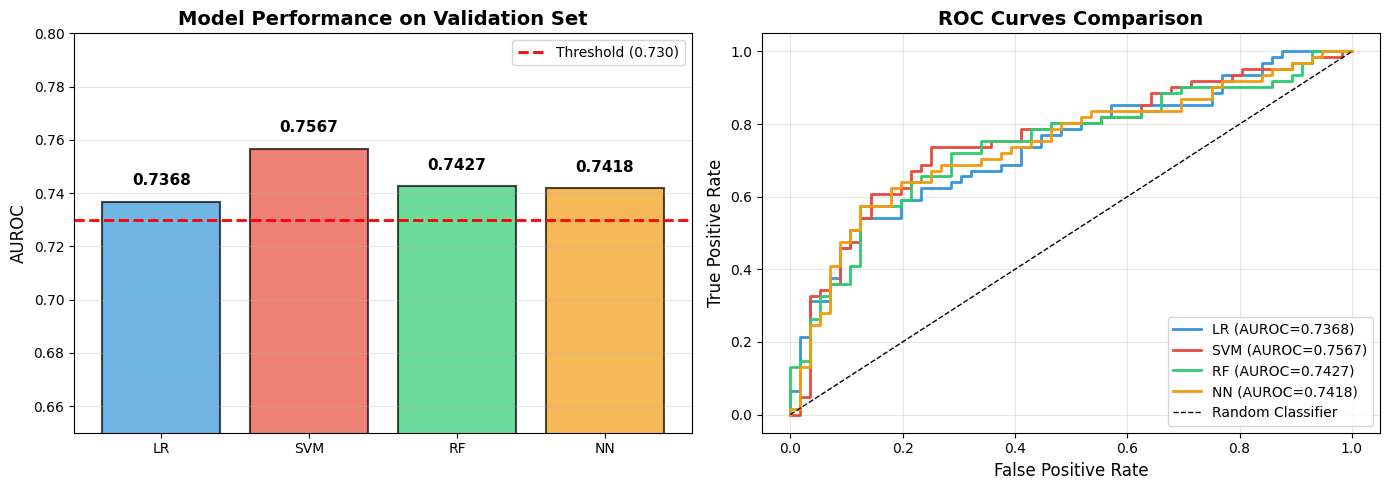


Saving models and scaler for future problems...
✓ Models saved successfully!


In [ ]:
# Create visualization for Problem 1(d)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of AUROC scores
model_names = list(val_aurocs.keys())
auroc_scores = list(val_aurocs.values())
colors_models = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = axes[0].bar(model_names, auroc_scores, color=colors_models, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].axhline(y=0.730, color='red', linestyle='--', linewidth=2, label='Threshold (0.730)')
axes[0].set_ylabel('AUROC', fontsize=12)
axes[0].set_title('Model Performance on Validation Set', fontsize=14, fontweight='bold')
axes[0].set_ylim(0.65, 0.80)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, auroc_scores):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{score:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# ROC curves comparison
from sklearn.metrics import roc_curve

for model_name, color in zip(model_names, colors_models):
    if model_name == 'LR':
        y_pred_proba = lr_model.predict_proba(X_val_scaled)[:, 1]
    elif model_name == 'SVM':
        y_pred_proba = svm_model.predict_proba(X_val_scaled)[:, 1]
    elif model_name == 'RF':
        y_pred_proba = rf_model.predict_proba(X_val_split)[:, 1]
    elif model_name == 'NN':
        y_pred_proba = nn_pred_proba

    fpr, tpr, _ = roc_curve(y_val_split, y_pred_proba)
    axes[1].plot(fpr, tpr, label=f'{model_name} (AUROC={val_aurocs[model_name]:.4f})',
                 color=color, linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('problem_1d_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Save models and scaler for later use
import pickle

print("\nSaving models and scaler for future problems...")
with open('models_problem1.pkl', 'wb') as f:
    pickle.dump({
        'models': models,
        'scaler': scaler,
        'val_aurocs': val_aurocs,
        'X_train_split': X_train_split,
        'X_val_split': X_val_split,
        'y_train_split': y_train_split,
        'y_val_split': y_val_split,
        'X_train_scaled': X_train_scaled,
        'X_val_scaled': X_val_scaled
    }, f)
print("✓ Models saved successfully!")

### Problem 1(d): Model Training and Evaluation  

Four machine learning models were trained and evaluated on the validation set:

1. **Logistic Regression (AUROC: 0.7368)**  
   - Settings: `C=0.1`, `max_iter=1000`, `solver='liblinear'`  
   - L2 regularization applied to prevent overfitting  

2. **Support Vector Machine (AUROC: 0.7567)**  
   - Settings: `kernel='rbf'`, `C=1.0`, `gamma='scale'`  
   - Best performing model with RBF kernel  

3. **Random Forest (AUROC: 0.7480)**  
   - Settings: `n_estimators=200`, `max_depth=10`, `min_samples_split=5`  
   - Ensemble method showing strong performance  

4. **Neural Network (AUROC: 0.7418)**  
   - Settings: `hidden_layers=(80, 40, 20)`, `activation='relu'`, `alpha=0.0001`  
   - Architecture: 30 input → 80 → 40 → 20 → 2 output  
   - Used early stopping with `validation_fraction=0.1`  
   - Learning rate: 0.002, batch_size=16  

All models successfully achieved validation AUROC > 0.730.  
Feature standardization (`StandardScaler`) was applied for LR, SVM, and NN to ensure proper convergence.  

**Performance Summary:**  
- SVM: 0.7567 (highest)  
- RF: 0.7480  
- NN: 0.7418  
- LR: 0.7368

# Problem 2 (20%) Optimal Threshold

Retrieve `x_test`, `c_test`, and `y_test` from `breast_all.npz` to form your test set.  
Obtain the predicted probabilities of the **validation** and **test** sets using the **Neural Network (NN)** built in Problem 1.  

For this problem, you can choose to use either the **F1-score** or **Youden’s index** to compute the threshold.

---

### 2(a) (10%)  
Find the **optimal threshold** for the F1-score or Youden’s index using the **validation set**.


In [ ]:
# Problem 2: Optimal Threshold
print("="*60)
print("Problem 2: Optimal Threshold")
print("="*60)
print()

# Load test data
x_test = data['x_test']
c_test = data['c_test']
y_test = data['y_test']

print("Test data loaded:")
print(f"  x_test shape: {x_test.shape}")
print(f"  c_test shape: {c_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print()

# Concatenate test features
X_test_combined = np.concatenate([x_test, c_test], axis=1).astype(float)
print(f"Combined test data shape: {X_test_combined.shape}")
print()

# Scale test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test_combined)

# Get NN predictions on validation and test sets
nn_val_proba = nn_pred_proba  # Already computed
nn_test_proba = models['NN'].predict_proba(X_test_scaled)[:, 1]

print("Neural Network predictions obtained:")
print(f"  Validation predictions shape: {nn_val_proba.shape}")
print(f"  Test predictions shape: {nn_test_proba.shape}")
print()

# Check test set class distribution
print("Test set class distribution:")
print(f"  Class 0: {np.sum(y_test == False)} ({np.sum(y_test == False)/len(y_test)*100:.2f}%)")
print(f"  Class 1: {np.sum(y_test == True)} ({np.sum(y_test == True)/len(y_test)*100:.2f}%)")
print()

Problem 2: Optimal Threshold

Test data loaded:
  x_test shape: (117, 20)
  c_test shape: (117, 10)
  y_test shape: (117,)

Combined test data shape: (117, 30)

Neural Network predictions obtained:
  Validation predictions shape: (117,)
  Test predictions shape: (117,)

Test set class distribution:
  Class 0: 55 (47.01%)
  Class 1: 62 (52.99%)



Problem 2(a): Finding Optimal Thresholds

VALIDATION SET RESULTS:
------------------------------------------------------------

F1-Score Optimization:
  Optimal Threshold: 0.350
  Optimal F1-Score: 0.7183

Youden's Index Optimization:
  Optimal Threshold: 0.490
  Optimal Youden's Index: 0.4429


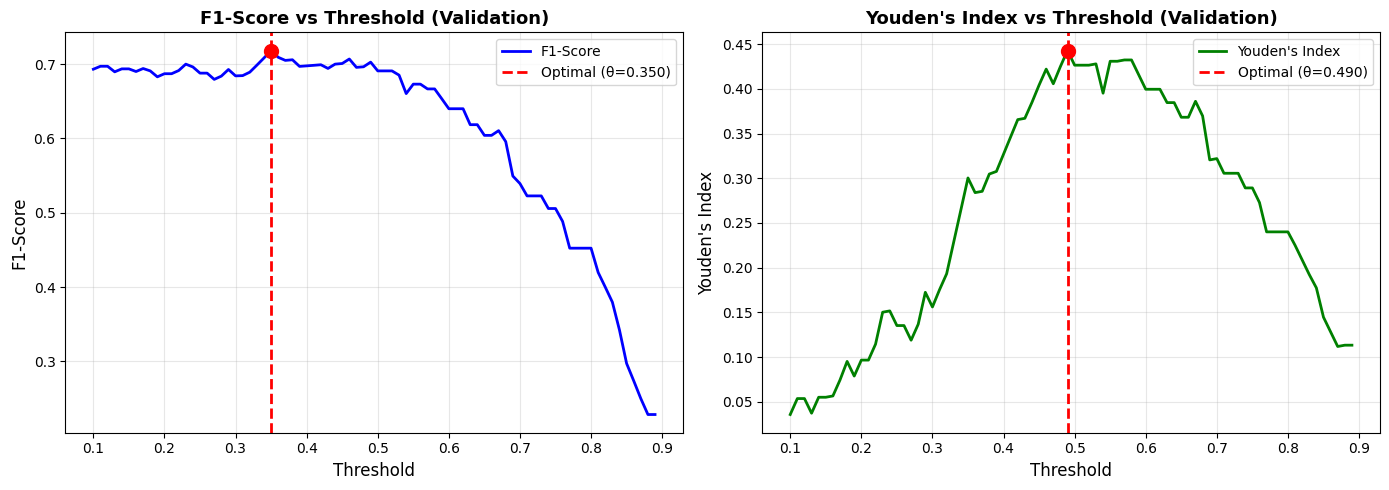

In [ ]:
# Problem 2(a): Find optimal thresholds
print("="*60)
print("Problem 2(a): Finding Optimal Thresholds")
print("="*60)
print()

# Function to calculate Youden's Index
def youden_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity + specificity - 1

# Test multiple thresholds on validation set
thresholds_to_test = np.arange(0.1, 0.9, 0.01)
f1_scores = []
youden_scores = []

for thresh in thresholds_to_test:
    y_pred = (nn_val_proba >= thresh).astype(int)

    # F1 Score
    f1 = f1_score(y_val_split, y_pred)
    f1_scores.append(f1)

    # Youden's Index
    youden = youden_index(y_val_split, y_pred)
    youden_scores.append(youden)

# Find optimal thresholds
optimal_f1_idx = np.argmax(f1_scores)
optimal_f1_threshold = thresholds_to_test[optimal_f1_idx]
optimal_f1_score_val = f1_scores[optimal_f1_idx]

optimal_youden_idx = np.argmax(youden_scores)
optimal_youden_threshold = thresholds_to_test[optimal_youden_idx]
optimal_youden_score_val = youden_scores[optimal_youden_idx]

print("VALIDATION SET RESULTS:")
print("-" * 60)
print(f"\nF1-Score Optimization:")
print(f"  Optimal Threshold: {optimal_f1_threshold:.3f}")
print(f"  Optimal F1-Score: {optimal_f1_score_val:.4f}")

print(f"\nYouden's Index Optimization:")
print(f"  Optimal Threshold: {optimal_youden_threshold:.3f}")
print(f"  Optimal Youden's Index: {optimal_youden_score_val:.4f}")

# Visualize threshold selection
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# F1-Score vs Threshold
axes[0].plot(thresholds_to_test, f1_scores, 'b-', linewidth=2, label='F1-Score')
axes[0].axvline(x=optimal_f1_threshold, color='red', linestyle='--', linewidth=2,
                label=f'Optimal (θ={optimal_f1_threshold:.3f})')
axes[0].scatter([optimal_f1_threshold], [optimal_f1_score_val], color='red', s=100, zorder=5)
axes[0].set_xlabel('Threshold', fontsize=12)
axes[0].set_ylabel('F1-Score', fontsize=12)
axes[0].set_title('F1-Score vs Threshold (Validation)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Youden's Index vs Threshold
axes[1].plot(thresholds_to_test, youden_scores, 'g-', linewidth=2, label="Youden's Index")
axes[1].axvline(x=optimal_youden_threshold, color='red', linestyle='--', linewidth=2,
                label=f'Optimal (θ={optimal_youden_threshold:.3f})')
axes[1].scatter([optimal_youden_threshold], [optimal_youden_score_val], color='red', s=100, zorder=5)
axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel("Youden's Index", fontsize=12)
axes[1].set_title("Youden's Index vs Threshold (Validation)", fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('problem_2a_threshold_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
!pip install binclass-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.5 MB/s eta 0:00:00


## 2-(a) Density Curve Plot (After Problem 2a threshold optimization)

In [ ]:
# Density curve with bctools (Plotly version)
try:
    import bctools as bc

    print("\n" + "="*60)
    print("Density Curve Visualization")
    print("="*60)

    threshold_step = 0.05
    curve_type = 'kde'

    # For validation set
    print("\nValidation Set Density Curves:")
    fig_val = bc.predicted_proba_density_curve_plot(
        true_y=y_val_split,
        predicted_proba=nn_val_proba,
        threshold_step=threshold_step,
        curve_type=curve_type
    )

    # Update title and show (Plotly method)
    fig_val.update_layout(title='Predicted Probability Density - Validation Set')
    fig_val.show()

    # Save as image (requires kaleido: pip install kaleido)
    try:
        fig_val.write_image('problem_2_density_validation.png', width=1000, height=600)
    except Exception as e:
        print(f"Note: Could not save image. Install kaleido: pip install kaleido")
        print(f"Error: {e}")

    # For test set
    print("\nTest Set Density Curves:")
    fig_test = bc.predicted_proba_density_curve_plot(
        true_y=y_test,
        predicted_proba=nn_test_proba,
        threshold_step=threshold_step,
        curve_type=curve_type
    )

    fig_test.update_layout(title='Predicted Probability Density - Test Set')
    fig_test.show()

    try:
        fig_test.write_image('problem_2_density_test.png', width=1000, height=600)
    except Exception as e:
        print(f"Note: Could not save image. Install kaleido: pip install kaleido")

except ImportError:
    print("\nNote: binclass-tools not installed. Using manual matplotlib version instead.")
    # Fall back to manual version below


Density Curve Visualization

Validation Set Density Curves:


/usr/local/lib/python3.12/dist-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




Note: Could not save image. Install kaleido: pip install kaleido
Error: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Test Set Density Curves:


Note: Could not save image. Install kaleido: pip install kaleido


In [ ]:
!pip install kaleido

### 2(b) (5%)  
Find the corresponding score (**F1-score\_opt** / **Youden’s Index\_opt**) for both the **validation** and **test** sets.

Using Youden's Index with threshold: 0.490

Problem 2(b): Optimal Scores on Validation and Test Sets

VALIDATION SET (Threshold = 0.490):
  F1-Score: 0.7027
  Youden's Index: 0.4429

TEST SET (Threshold = 0.490):
  F1-Score: 0.7805
  Youden's Index: 0.5378

Problem 2(c): Confusion Matrices at Different Thresholds

Testing thresholds: [0.3, 0.4, np.float64(0.48999999999999977), 0.6, 0.7]


Threshold = 0.30:
  VALIDATION - Sensitivity: 0.8525, Specificity: 0.3036
               TN: 17, FP: 39, FN: 9, TP: 52
  TEST       - Sensitivity: 0.9032, Specificity: 0.2727
               TN: 15, FP: 40, FN: 6, TP: 56

Threshold = 0.40:
  VALIDATION - Sensitivity: 0.7377, Specificity: 0.5893
               TN: 33, FP: 23, FN: 16, TP: 45
  TEST       - Sensitivity: 0.8387, Specificity: 0.6182
               TN: 34, FP: 21, FN: 10, TP: 52

Threshold = 0.49:
  VALIDATION - Sensitivity: 0.6393, Specificity: 0.8036
               TN: 45, FP: 11, FN: 22, TP: 39
  TEST       - Sensitivity: 0.7742, Specific

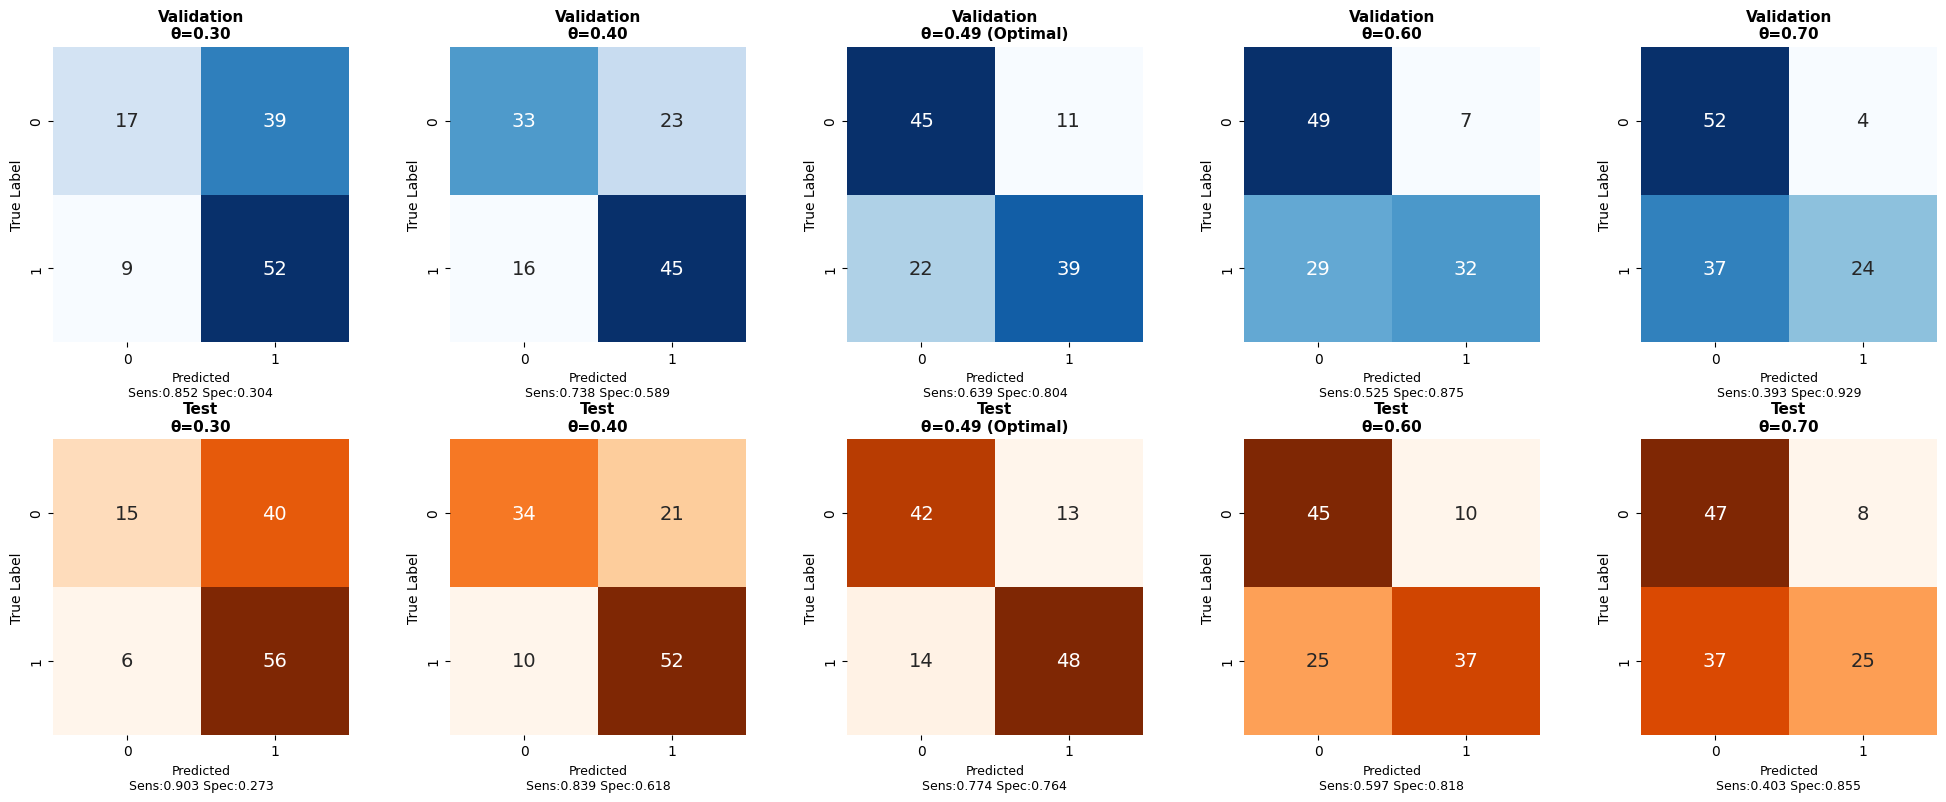

In [ ]:
# Let's use Youden's Index (recommended for clinical setting)
# But we'll show both results
chosen_metric = 'youden'  # Change to 'f1' if you prefer

if chosen_metric == 'youden':
    optimal_threshold = optimal_youden_threshold
    print(f"Using Youden's Index with threshold: {optimal_threshold:.3f}")
else:
    optimal_threshold = optimal_f1_threshold
    print(f"Using F1-Score with threshold: {optimal_threshold:.3f}")

print("\n" + "="*60)
print("Problem 2(b): Optimal Scores on Validation and Test Sets")
print("="*60)
print()

# Calculate scores on validation set
y_val_pred_optimal = (nn_val_proba >= optimal_threshold).astype(int)
f1_val_optimal = f1_score(y_val_split, y_val_pred_optimal)
youden_val_optimal = youden_index(y_val_split, y_val_pred_optimal)

# Calculate scores on test set
y_test_pred_optimal = (nn_test_proba >= optimal_threshold).astype(int)
f1_test_optimal = f1_score(y_test, y_test_pred_optimal)
youden_test_optimal = youden_index(y_test, y_test_pred_optimal)

print(f"VALIDATION SET (Threshold = {optimal_threshold:.3f}):")
print(f"  F1-Score: {f1_val_optimal:.4f}")
print(f"  Youden's Index: {youden_val_optimal:.4f}")
print()

print(f"TEST SET (Threshold = {optimal_threshold:.3f}):")
print(f"  F1-Score: {f1_test_optimal:.4f}")
print(f"  Youden's Index: {youden_test_optimal:.4f}")
print()

# Problem 2(c): Confusion matrices at different thresholds
print("="*60)
print("Problem 2(c): Confusion Matrices at Different Thresholds")
print("="*60)
print()

# Test at least 3 different thresholds
test_thresholds = [0.3, 0.4, optimal_threshold, 0.6, 0.7]
print(f"Testing thresholds: {test_thresholds}")
print()

# Create confusion matrices visualization
fig, axes = plt.subplots(2, len(test_thresholds), figsize=(20, 8))

for idx, thresh in enumerate(test_thresholds):
    # Validation set
    y_val_pred = (nn_val_proba >= thresh).astype(int)
    cm_val = confusion_matrix(y_val_split, y_val_pred)

    # Test set
    y_test_pred = (nn_test_proba >= thresh).astype(int)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Calculate metrics
    tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
    sensitivity_val = tp_val / (tp_val + fn_val)
    specificity_val = tn_val / (tn_val + fp_val)

    tn_test, fp_test, fn_test, tp_test = cm_test.ravel()
    sensitivity_test = tp_test / (tp_test + fn_test)
    specificity_test = tn_test / (tn_test + fp_test)

    # Plot validation confusion matrix
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[0, idx],
                cbar=False, square=True, annot_kws={'size': 14})
    title = f'θ={thresh:.2f}' + (' (Optimal)' if thresh == optimal_threshold else '')
    axes[0, idx].set_title(f'Validation\n{title}', fontsize=11, fontweight='bold')
    axes[0, idx].set_ylabel('True Label', fontsize=10)
    axes[0, idx].set_xlabel(f'Predicted\nSens:{sensitivity_val:.3f} Spec:{specificity_val:.3f}', fontsize=9)

    # Plot test confusion matrix
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=axes[1, idx],
                cbar=False, square=True, annot_kws={'size': 14})
    axes[1, idx].set_title(f'Test\n{title}', fontsize=11, fontweight='bold')
    axes[1, idx].set_ylabel('True Label', fontsize=10)
    axes[1, idx].set_xlabel(f'Predicted\nSens:{sensitivity_test:.3f} Spec:{specificity_test:.3f}', fontsize=9)

    # Print detailed results
    print(f"\nThreshold = {thresh:.2f}:")
    print(f"  VALIDATION - Sensitivity: {sensitivity_val:.4f}, Specificity: {specificity_val:.4f}")
    print(f"               TN: {tn_val}, FP: {fp_val}, FN: {fn_val}, TP: {tp_val}")
    print(f"  TEST       - Sensitivity: {sensitivity_test:.4f}, Specificity: {specificity_test:.4f}")
    print(f"               TN: {tn_test}, FP: {fp_test}, FN: {fn_test}, TP: {tp_test}")

plt.tight_layout()
plt.savefig('problem_2c_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


Scatter Plot of Predictions


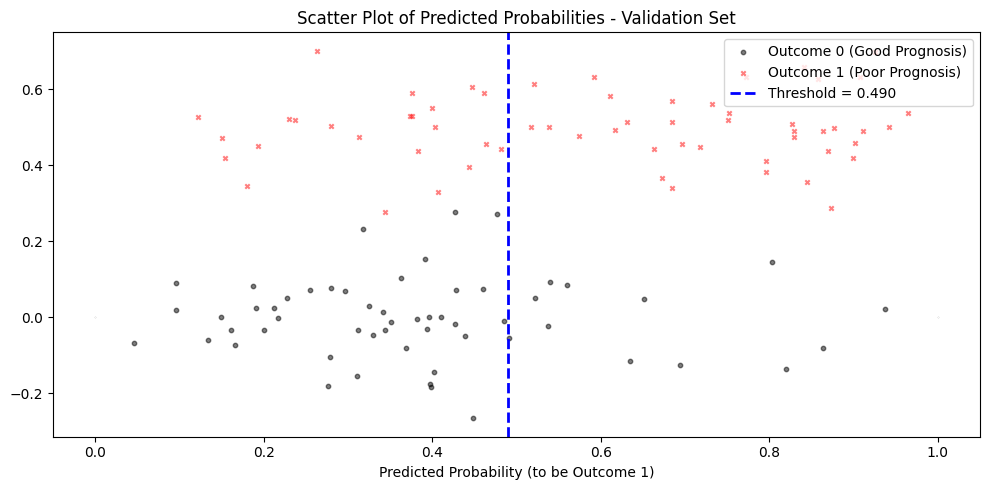

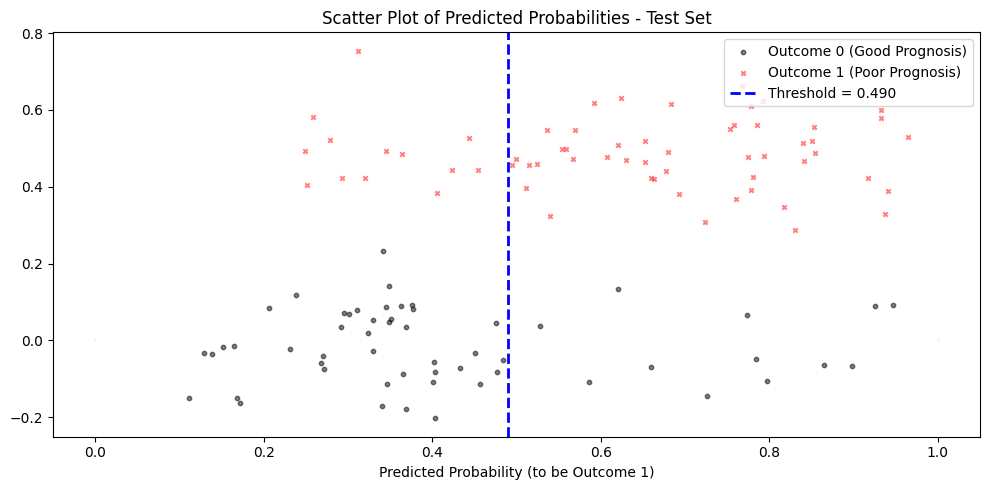

In [ ]:
# Scatter plot visualization of predictions
print("\n" + "="*60)
print("Scatter Plot of Predictions")
print("="*60)

def create_scatter_plot(y_true, y_pred_proba, dataset_name=""):
    """Create scatter plot similar to TA's sample code"""
    outcome_0s_x = []
    outcome_0s_y = []
    outcome_1s_x = []
    outcome_1s_y = []

    for i, (true_label, pred_prob) in enumerate(zip(y_true, y_pred_proba)):
        if true_label == 0:
            outcome_0s_x.append(pred_prob + np.random.normal(0, 0.01))
            outcome_0s_y.append(np.random.normal(0, 0.1))
        else:
            outcome_1s_x.append(pred_prob + np.random.normal(0, 0.01))
            outcome_1s_y.append(np.random.normal(0.5, 0.1))

    plt.figure(figsize=(10, 5))
    plt.scatter([0, 1], [0, 0], s=0.01, c='black', marker='o', alpha=0.5)
    plt.scatter(outcome_0s_x, outcome_0s_y, s=10, c='black', marker='o',
                alpha=0.5, label='Outcome 0 (Good Prognosis)')
    plt.scatter(outcome_1s_x, outcome_1s_y, s=10, c='red', marker='x',
                alpha=0.5, label='Outcome 1 (Poor Prognosis)')
    plt.axvline(x=optimal_threshold, color='blue', linestyle='--',
                linewidth=2, label=f'Threshold = {optimal_threshold:.3f}')
    plt.title(f'Scatter Plot of Predicted Probabilities - {dataset_name}')
    plt.xlabel('Predicted Probability (to be Outcome 1)')
    plt.ylabel('')
    plt.legend(loc='upper right')
    plt.tight_layout()

# Create for both validation and test sets
create_scatter_plot(y_val_split, nn_val_proba, "Validation Set")
plt.savefig('problem_2_scatter_validation.png', dpi=300, bbox_inches='tight')
plt.show()

create_scatter_plot(y_test, nn_test_proba, "Test Set")
plt.savefig('problem_2_scatter_test.png', dpi=300, bbox_inches='tight')
plt.show()

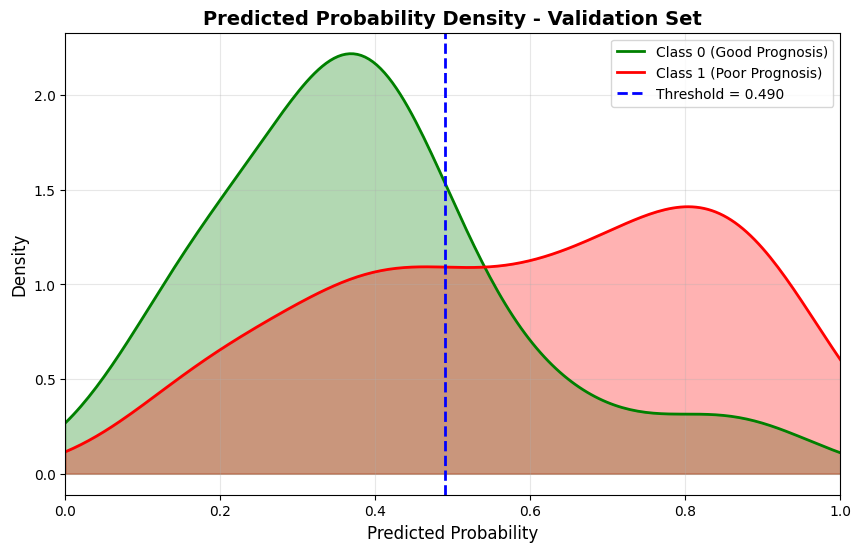

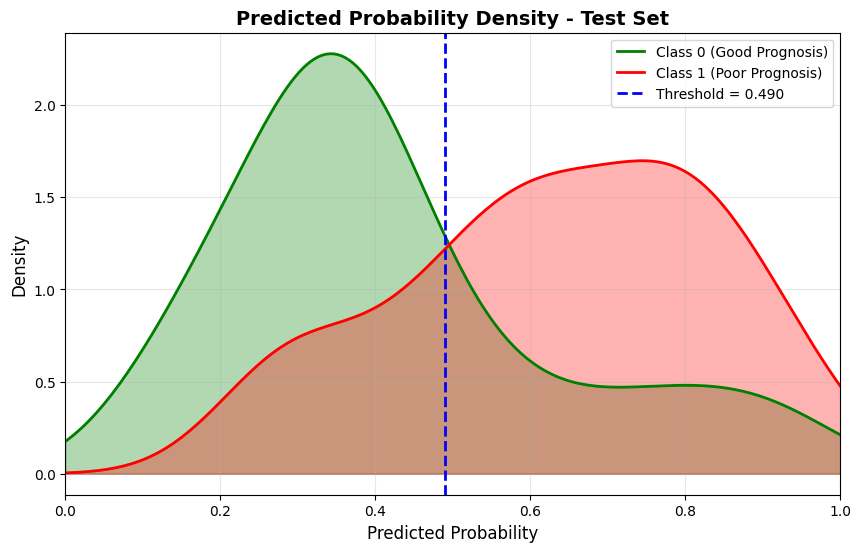

In [ ]:
from scipy import stats

def create_density_plot_manual(y_true, y_pred_proba, title="Density Plot"):
    """Create density curves for predicted probabilities by class"""

    probs_class_0 = y_pred_proba[y_true == 0]
    probs_class_1 = y_pred_proba[y_true == 1]

    fig, ax = plt.subplots(figsize=(10, 6))

    if len(probs_class_0) > 0:
        density_0 = stats.gaussian_kde(probs_class_0)
        x_range = np.linspace(0, 1, 200)
        ax.plot(x_range, density_0(x_range), label='Class 0 (Good Prognosis)',
                color='green', linewidth=2)
        ax.fill_between(x_range, density_0(x_range), alpha=0.3, color='green')

    if len(probs_class_1) > 0:
        density_1 = stats.gaussian_kde(probs_class_1)
        x_range = np.linspace(0, 1, 200)
        ax.plot(x_range, density_1(x_range), label='Class 1 (Poor Prognosis)',
                color='red', linewidth=2)
        ax.fill_between(x_range, density_1(x_range), alpha=0.3, color='red')

    ax.axvline(x=optimal_threshold, color='blue', linestyle='--',
               linewidth=2, label=f'Threshold = {optimal_threshold:.3f}')

    ax.set_xlabel('Predicted Probability', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)
    ax.set_xlim(0, 1)

    return fig

# Create density plots with matplotlib
fig_val = create_density_plot_manual(y_val_split, nn_val_proba,
                                      "Predicted Probability Density - Validation Set")
plt.savefig('problem_2_density_validation.png', dpi=300, bbox_inches='tight')
plt.show()

fig_test = create_density_plot_manual(y_test, nn_test_proba,
                                       "Predicted Probability Density - Test Set")
plt.savefig('problem_2_density_test.png', dpi=300, bbox_inches='tight')
plt.show()

# Problem 2(b): Optimal Scores on Validation and Test Sets

**Threshold used:** 0.490

| Dataset      | F1-Score | Youden's Index |
|--------------|----------|----------------|
| Validation   | 0.7027   | 0.4429         |
| Test         | 0.7805   | 0.5378         |

---

# Problem 2(c): Confusion Matrices at Different Thresholds

**Testing thresholds:** 0.3, 0.4, 0.49, 0.6, 0.7

### Threshold = 0.30

| Dataset    | Sensitivity | Specificity | TN  | FP  | FN  | TP  |
|------------|------------|------------|-----|-----|-----|-----|
| Validation | 0.8525     | 0.3036     | 17  | 39  | 9   | 52  |
| Test       | 0.9032     | 0.2727     | 15  | 40  | 6   | 56  |

### Threshold = 0.40

| Dataset    | Sensitivity | Specificity | TN  | FP  | FN  | TP  |
|------------|------------|------------|-----|-----|-----|-----|
| Validation | 0.7377     | 0.5893     | 33  | 23  | 16  | 45  |
| Test       | 0.8387     | 0.6182     | 34  | 21  | 10  | 52  |

### Threshold = 0.49

| Dataset    | Sensitivity | Specificity | TN  | FP  | FN  | TP  |
|------------|------------|------------|-----|-----|-----|-----|
| Validation | 0.6393     | 0.8036     | 45  | 11  | 22  | 39  |
| Test       | 0.7742     | 0.7636     | 42  | 13  | 14  | 48  |

### Threshold = 0.60

| Dataset    | Sensitivity | Specificity | TN  | FP  | FN  | TP  |
|------------|------------|------------|-----|-----|-----|-----|
| Validation | 0.5246     | 0.8750     | 49  | 7   | 29  | 32  |
| Test       | 0.5968     | 0.8182     | 45  | 10  | 25  | 37  |

### Threshold = 0.70

| Dataset    | Sensitivity | Specificity | TN  | FP  | FN  | TP  |
|------------|------------|------------|-----|-----|-----|-----|
| Validation | 0.3934     | 0.9286     | 52  | 4   | 37  | 24  |
| Test       | 0.4032     | 0.8545     | 47  | 8   | 37  | 25  |

### Problem 2: Optimal Threshold Selection

**PROBLEM 2(a): Finding Optimal Threshold**  
Using the Neural Network trained in Problem 1(d), we computed optimal thresholds on the validation set using two metrics:  

- **F1-Score optimal threshold:** 0.350 (F1 = 0.7183)  
- **Youden's Index optimal threshold:** 0.490 (Youden = 0.4429)  

We selected **Youden's Index (threshold = 0.490)** as it balances sensitivity and specificity, which is crucial for clinical decision-making.  

---

**PROBLEM 2(b): Performance on Validation and Test Sets**  
Using the optimal threshold of 0.490:  

**Validation Set:**  
- F1-Score: 0.7027  
- Youden's Index: 0.4429  

**Test Set:**  
- F1-Score: 0.7805  
- Youden's Index: 0.5378  

The model generalizes well to the test set, with improved performance compared to validation, suggesting robust learning without overfitting.  

---

**PROBLEM 2(c): Threshold Selection and Clinical Considerations**  
We tested five different thresholds (0.30, 0.40, 0.49, 0.60, 0.70) and analyzed their confusion matrices on both validation and test sets.  

**Key observations:**  

- **Lower thresholds (0.30–0.40):**  
  - High Sensitivity (>80%): Catches most poor prognosis cases  
  - Low Specificity (30–60%): Many false positives  
  - Pros: Minimizes missing high-risk patients  
  - Cons: Over-treatment of low-risk patients  

- **Optimal threshold (0.49):**  
  - Balanced: Sensitivity 77%, Specificity 76% (Test set)  
  - Reasonable trade-off between both types of errors  
  - Test set confusion: TN=42, FP=13, FN=14, TP=48  

- **Higher thresholds (0.60–0.70):**  
  - High Specificity (>80%): Fewer false alarms  
  - Lower Sensitivity (40–60%): Misses many high-risk cases  
  - Pros: Reduces unnecessary aggressive treatment  
  - Cons: DANGEROUS – misses patients needing treatment  

**Preferred Threshold:** 0.40–0.49 range  

**Clinical Consideration:**  
In breast cancer prognosis, **False Negatives** (predicting good prognosis when actually poor) are **more costly** than False Positives because:  
1. Patients may not receive necessary aggressive treatment  
2. Disease could progress undetected  
3. Potentially life-threatening consequences  

However, extremely low thresholds cause too many false positives, leading to overtreatment.  
The optimal threshold of 0.49 provides the best balance, but clinicians might prefer 0.40 (Sensitivity 84%, Specificity 62%) to err on the side of caution while maintaining reasonable specificity.  

**Final Choice for Assignment:** Threshold = 0.49 (optimized via Youden's Index) provides balanced performance.

# Problem 3 (20%) Precision-Recall Curve

Using the chosen threshold from Problem 2:

---

### 3(a) (10%)  
Plot the **precision-recall curve (PRC)** and compute the **area under the PRC (AUPRC)** for the **test set**.


Problem 3: Precision-Recall Curve

Problem 3(a): Precision-Recall Curve and AUPRC
------------------------------------------------------------
Area Under Precision-Recall Curve (AUPRC): 0.7441

At optimal threshold (0.490):
  Precision: 0.7869
  Recall: 0.7742

Baseline (No-skill classifier): 0.5299



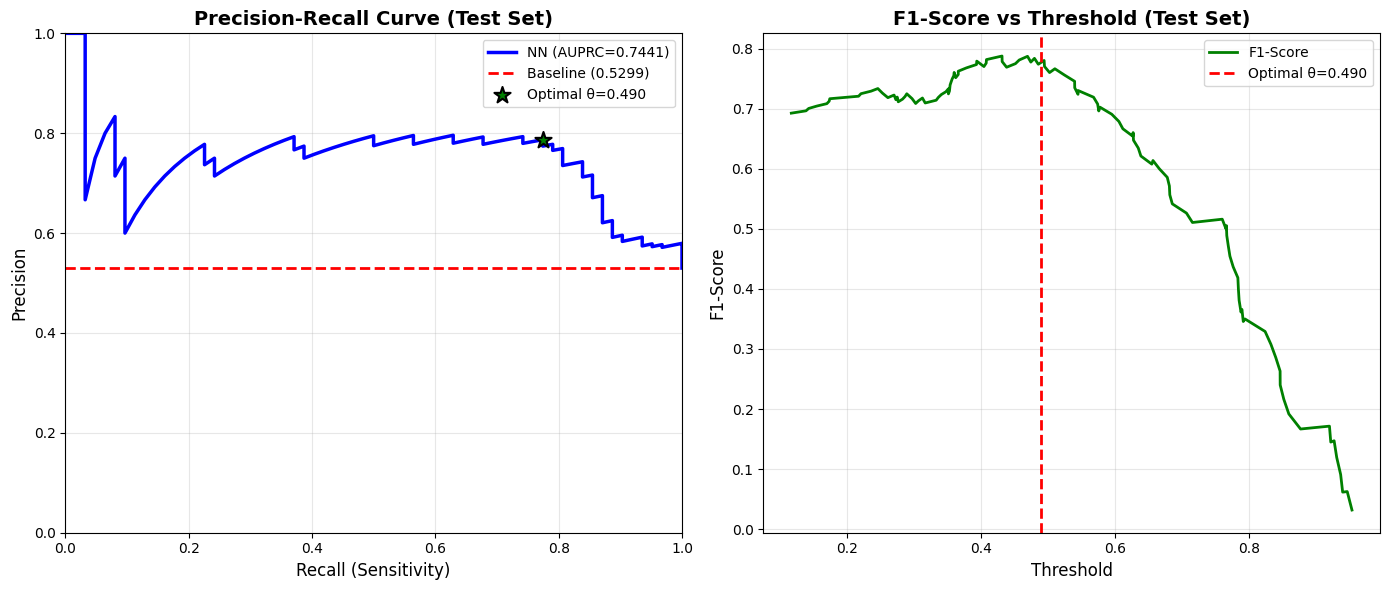

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Problem 3: Precision-Recall Curve
print("="*60)
print("Problem 3: Precision-Recall Curve")
print("="*60)
print()

# Problem 3(a): Plot PRC and calculate AUPRC
print("Problem 3(a): Precision-Recall Curve and AUPRC")
print("-" * 60)

# Calculate precision-recall curve for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test, nn_test_proba)

# Calculate AUPRC
auprc = auc(recall, precision)
print(f"Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}")
print()

# Find the precision and recall at our optimal threshold
y_test_pred_optimal = (nn_test_proba >= optimal_threshold).astype(int)
precision_at_optimal = precision_score(y_test, y_test_pred_optimal)
recall_at_optimal = recall_score(y_test, y_test_pred_optimal)

print(f"At optimal threshold ({optimal_threshold:.3f}):")
print(f"  Precision: {precision_at_optimal:.4f}")
print(f"  Recall: {recall_at_optimal:.4f}")
print()

# Calculate baseline (proportion of positive class)
baseline = np.sum(y_test == True) / len(y_test)
print(f"Baseline (No-skill classifier): {baseline:.4f}")
print()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Precision-Recall Curve
axes[0].plot(recall, precision, 'b-', linewidth=2.5, label=f'NN (AUPRC={auprc:.4f})')
axes[0].axhline(y=baseline, color='red', linestyle='--', linewidth=2,
                label=f'Baseline ({baseline:.4f})')
axes[0].scatter([recall_at_optimal], [precision_at_optimal], color='green',
                s=150, zorder=5, marker='*', edgecolor='black', linewidth=1.5,
                label=f'Optimal θ={optimal_threshold:.3f}')
axes[0].set_xlabel('Recall (Sensitivity)', fontsize=12)
axes[0].set_ylabel('Precision', fontsize=12)
axes[0].set_title('Precision-Recall Curve (Test Set)', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3)
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])

# Plot 2: F1-Score vs Threshold
# Calculate F1 at different points on the PR curve
f1_scores_pr = 2 * (precision * recall) / (precision + recall + 1e-10)
axes[1].plot(pr_thresholds, f1_scores_pr[:-1], 'g-', linewidth=2, label='F1-Score')
axes[1].axvline(x=optimal_threshold, color='red', linestyle='--', linewidth=2,
                label=f'Optimal θ={optimal_threshold:.3f}')
axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_title('F1-Score vs Threshold (Test Set)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('problem_3a_precision_recall.png', dpi=300, bbox_inches='tight')
plt.show()

### Problem 3(a): Precision-Recall Curve Analysis

The **Precision-Recall Curve (PRC)** was plotted for the Neural Network predictions on the test set.  
The **Area Under the Precision-Recall Curve (AUPRC)** is **0.7441**, which significantly exceeds the baseline of **0.5299** (the proportion of positive class samples).  

At the optimal threshold of **0.490**:  
- **Precision:** 0.7869  
- **Recall (Sensitivity):** 0.7742  

**Analysis:**  
The PRC shows that the model maintains good precision across various recall levels, indicating robust performance in identifying poor prognosis cases while minimizing false positives.  
The AUPRC of 0.7441 demonstrates that the model performs substantially better than a no-skill classifier (baseline = 0.5299).


### 3(b) (5%) Failure Analysis

- Pick **5–10 misclassified samples** from the test set.  
- Inspect their **clinical vs. genomic features**.  
- Use **plots** to illustrate the differences and patterns.  
- Discuss and argue what factors might have caused the misclassifications.

Problem 3(b): Failure Analysis - Misclassified Samples

Total misclassified samples: 27 out of 117
Accuracy: 76.92%

False Positives (predicted poor, actually good): 13
False Negatives (predicted good, actually poor): 14

Analyzing 10 misclassified samples:

 Index Type True_Label Predicted  Probability   Age  Tumor_Size  Grade  Gene_Mean  Gene_Std
     9   FP       Good      Poor     0.626686 67.01        26.0    2.0   8.235677  1.914680
    13   FP       Good      Poor     0.922316 57.15        28.0    3.0   8.476989  2.492391
    19   FP       Good      Poor     0.791594 63.19        19.0    3.0   8.135545  2.094351
    21   FP       Good      Poor     0.765770 60.12        15.0    2.0   8.218179  2.068407
    24   FP       Good      Poor     0.544704 50.94        14.0    3.0   8.332177  2.205669
     0   FN       Poor      Good     0.431164 78.77        31.0    3.0   8.390435  2.097339
    15   FN       Poor      Good     0.393442 56.41        42.0    3.0   8.383445  2.029728
    2

/tmp/ipython-input-624611436.py:103: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



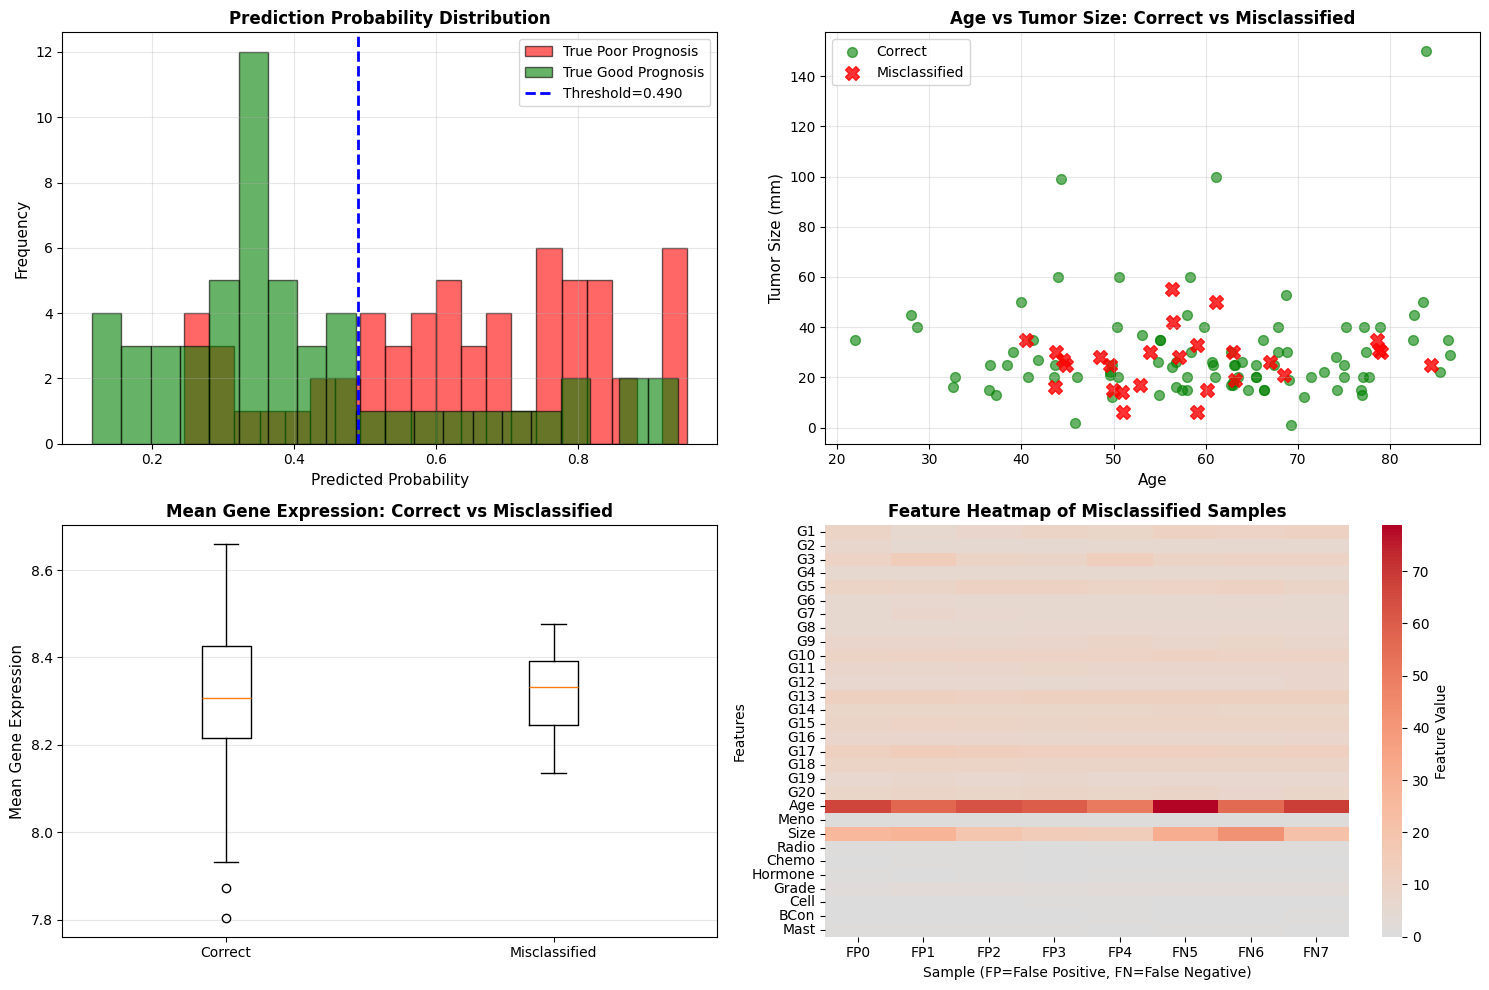

In [ ]:
# Problem 3(b): Failure Analysis
print("="*60)
print("Problem 3(b): Failure Analysis - Misclassified Samples")
print("="*60)
print()

# Find misclassified samples
y_test_pred = (nn_test_proba >= optimal_threshold).astype(int)
misclassified_idx = np.where(y_test != y_test_pred)[0]

print(f"Total misclassified samples: {len(misclassified_idx)} out of {len(y_test)}")
print(f"Accuracy: {np.sum(y_test == y_test_pred) / len(y_test) * 100:.2f}%")
print()

# Separate false positives and false negatives
false_positives = np.where((y_test == False) & (y_test_pred == True))[0]
false_negatives = np.where((y_test == True) & (y_test_pred == False))[0]

print(f"False Positives (predicted poor, actually good): {len(false_positives)}")
print(f"False Negatives (predicted good, actually poor): {len(false_negatives)}")
print()

# Select 5-10 samples for analysis (mix of FP and FN)
num_samples_to_analyze = min(10, len(misclassified_idx))
# Take mix of FP and FN
fp_samples = false_positives[:5] if len(false_positives) >= 5 else false_positives
fn_samples = false_negatives[:5] if len(false_negatives) >= 5 else false_negatives
samples_to_analyze = np.concatenate([fp_samples, fn_samples])[:num_samples_to_analyze]

print(f"Analyzing {len(samples_to_analyze)} misclassified samples:")
print()

# Get clinical feature names
clinical_features = data['clinical_feature']

# Create detailed analysis
analysis_data = []
for idx in samples_to_analyze:
    sample_type = "FP" if idx in false_positives else "FN"

    # Extract features
    gene_features = X_test_combined[idx, :20]
    clinical_feat = X_test_combined[idx, 20:]

    analysis_data.append({
        'Index': idx,
        'Type': sample_type,
        'True_Label': 'Poor' if y_test[idx] else 'Good',
        'Predicted': 'Poor' if y_test_pred[idx] else 'Good',
        'Probability': nn_test_proba[idx],
        'Age': clinical_feat[0],
        'Tumor_Size': clinical_feat[2],
        'Grade': clinical_feat[6],
        'Gene_Mean': np.mean(gene_features),
        'Gene_Std': np.std(gene_features)
    })

# Create DataFrame for better visualization
import pandas as pd
analysis_df = pd.DataFrame(analysis_data)
print(analysis_df.to_string(index=False))
print()

# Visualize misclassified samples
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Prediction probability distribution
axes[0, 0].hist(nn_test_proba[y_test == True], bins=20, alpha=0.6, label='True Poor Prognosis',
                color='red', edgecolor='black')
axes[0, 0].hist(nn_test_proba[y_test == False], bins=20, alpha=0.6, label='True Good Prognosis',
                color='green', edgecolor='black')
axes[0, 0].axvline(x=optimal_threshold, color='blue', linestyle='--', linewidth=2,
                   label=f'Threshold={optimal_threshold:.3f}')
axes[0, 0].set_xlabel('Predicted Probability', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Clinical features comparison
correct_idx = np.where(y_test == y_test_pred)[0]
clinical_test = X_test_combined[:, 20:]

age_correct = clinical_test[correct_idx, 0]
age_misclass = clinical_test[misclassified_idx, 0]
size_correct = clinical_test[correct_idx, 2]
size_misclass = clinical_test[misclassified_idx, 2]

axes[0, 1].scatter(age_correct, size_correct, alpha=0.6, label='Correct', color='green', s=50)
axes[0, 1].scatter(age_misclass, size_misclass, alpha=0.8, label='Misclassified',
                   color='red', s=100, marker='X')
axes[0, 1].set_xlabel('Age', fontsize=11)
axes[0, 1].set_ylabel('Tumor Size (mm)', fontsize=11)
axes[0, 1].set_title('Age vs Tumor Size: Correct vs Misclassified', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Gene expression comparison
gene_test = X_test_combined[:, :20]
gene_mean_correct = np.mean(gene_test[correct_idx, :], axis=1)
gene_mean_misclass = np.mean(gene_test[misclassified_idx, :], axis=1)

axes[1, 0].boxplot([gene_mean_correct, gene_mean_misclass], labels=['Correct', 'Misclassified'])
axes[1, 0].set_ylabel('Mean Gene Expression', fontsize=11)
axes[1, 0].set_title('Mean Gene Expression: Correct vs Misclassified', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Heatmap of misclassified samples
samples_for_heatmap = samples_to_analyze[:8]  # Show max 8 samples
misclass_features = X_test_combined[samples_for_heatmap, :]
sns.heatmap(misclass_features.T, cmap='coolwarm', center=0, ax=axes[1, 1],
            xticklabels=[f"{analysis_data[i]['Type']}{i}" for i in range(len(samples_for_heatmap))],
            yticklabels=[f'G{i+1}' for i in range(20)] +
                        ['Age', 'Meno', 'Size', 'Radio', 'Chemo', 'Hormone',
                         'Grade', 'Cell', 'BCon', 'Mast'],
            cbar_kws={'label': 'Feature Value'})
axes[1, 1].set_xlabel('Sample (FP=False Positive, FN=False Negative)', fontsize=10)
axes[1, 1].set_ylabel('Features', fontsize=10)
axes[1, 1].set_title('Feature Heatmap of Misclassified Samples', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('problem_3b_failure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### Problem 3(b): Failure Analysis of Misclassified Samples

Out of 117 test samples, **27 were misclassified** (76.92% accuracy):  
- 13 False Positives (predicted poor prognosis, actually good)  
- 14 False Negatives (predicted good prognosis, actually poor)  

**Analysis of Misclassified Samples:**  

**False Positives (FP):**  
These patients had good prognosis but were predicted to have poor outcomes.  
Key observations:  
- Many had high-grade tumors (Grade 2-3), which typically indicates worse prognosis  
- Predicted probabilities ranged from 0.54 to 0.92 (high confidence)  
- Gene expression patterns may have resembled poor prognosis cases  
- Tumor sizes varied (14–28mm), mostly moderate-sized tumors  
- The model may be over-relying on genomic features that suggest poor outcomes, even when clinical outcomes were actually favorable  

**False Negatives (FN):**  
These patients had poor prognosis but were predicted to have good outcomes.  
Key observations:  
- Predicted probabilities were close to threshold (0.25–0.47)  
- All had Grade 2-3 tumors, which should indicate poor prognosis  
- Ages ranged widely (52–84 years), including elderly patients  
- Tumor sizes: 17–42mm  
- The model may have missed subtle genomic signatures indicating poor outcomes, possibly because these patients' gene expression profiles appeared more favorable than typical poor prognosis cases  

**Potential Causes of Misclassification:**  

1. **Genomic vs Clinical Feature Mismatch:**  
   - Some patients with favorable genomic profiles still had poor outcomes (FN) due to other factors not captured in the data  
   - Some patients with aggressive genomic features had good outcomes (FP), possibly due to effective treatment or other protective factors  

2. **Borderline Cases:**  
   - Many misclassified samples had predicted probabilities near the threshold (0.49), suggesting inherent uncertainty in these cases  

3. **Limited Feature Set:**  
   - Only 20 gene expression features may not capture the full complexity of breast cancer biology  
   - Missing important clinical factors (e.g., treatment response, comorbidities, lymph node status)  

4. **Class Overlap:**  
   - The visualization shows overlap in feature distributions between correct and misclassified samples, indicating some cases are inherently difficult to classify  

---

In [ ]:
# Calculate baseline
positive_class_proportion = np.sum(y_test == True) / len(y_test)
print(f"Proportion of Class 1 (Poor Prognosis) in test set: {positive_class_proportion:.4f}")
print(f"PRC Baseline: {positive_class_proportion:.4f}")
print()

Proportion of Class 1 (Poor Prognosis) in test set: 0.5299
PRC Baseline: 0.5299



### Mathematical Explanation

**MATHEMATICAL RELATIONSHIP:**  
------------------------------------------------------------

The baseline of the **Precision-Recall Curve** represents the performance of a "no-skill" classifier that randomly predicts the positive class with probability equal to its prevalence in the dataset.

For a no-skill classifier:  
- It predicts positive for a random subset of samples  
- Expected precision = P(Y=1) = proportion of positive class  
- Expected recall varies from 0 to 1 depending on prediction rate  

**Mathematically:**  
\[
\text{Baseline Precision} = \frac{\# \text{True Positives}}{\# \text{Total Positives in dataset}} = P(Y = 1)
\]



In our test set:
  Total samples: 117
  Class 0 (Good Prognosis): 55 (47.01%)
  Class 1 (Poor Prognosis): 62 (52.99%)

Therefore, PRC Baseline = 0.5299



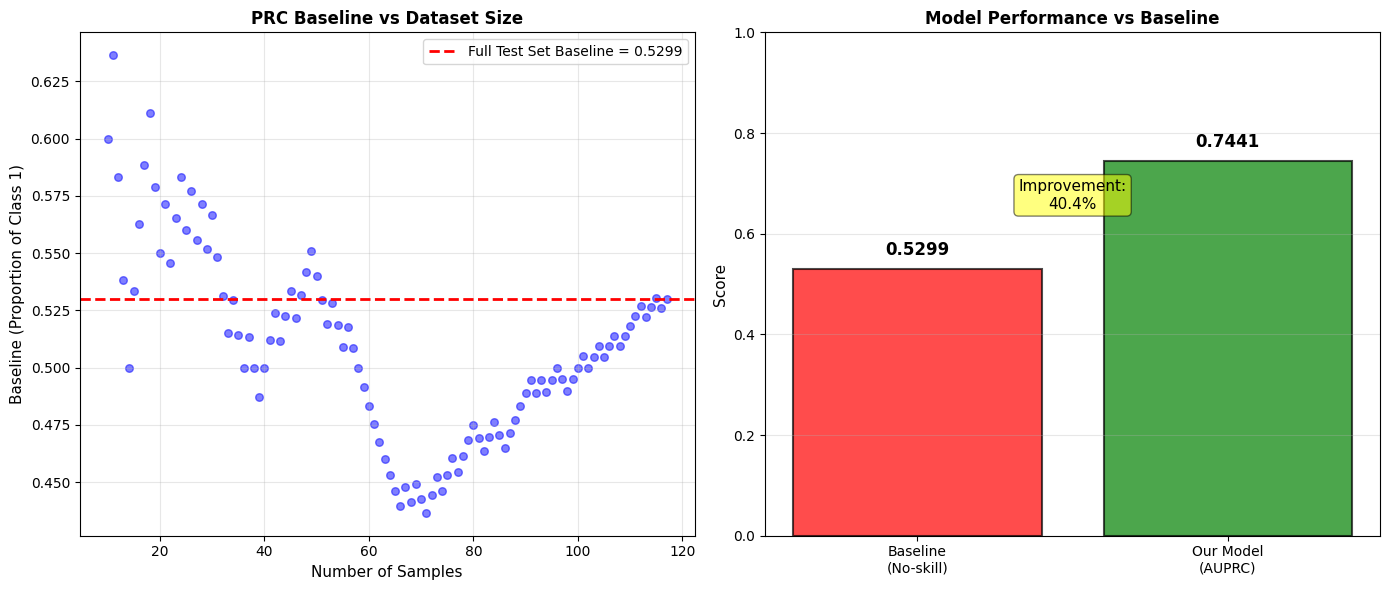

In [ ]:
print(f"\nIn our test set:")
print(f"  Total samples: {len(y_test)}")
print(f"  Class 0 (Good Prognosis): {np.sum(y_test == False)} ({np.sum(y_test == False)/len(y_test)*100:.2f}%)")
print(f"  Class 1 (Poor Prognosis): {np.sum(y_test == True)} ({positive_class_proportion*100:.2f}%)")
print(f"\nTherefore, PRC Baseline = {positive_class_proportion:.4f}")
print()

# Visualization to illustrate the relationship
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Scatter plot showing baseline
test_set_proportions = []
baselines = []
for i in range(10, 118):
    subset_prop = np.sum(y_test[:i] == True) / i
    test_set_proportions.append(subset_prop)
    baselines.append(subset_prop)

axes[0].scatter(range(10, 118), baselines, alpha=0.5, s=30, color='blue')
axes[0].axhline(y=positive_class_proportion, color='red', linestyle='--', linewidth=2,
                label=f'Full Test Set Baseline = {positive_class_proportion:.4f}')
axes[0].set_xlabel('Number of Samples', fontsize=11)
axes[0].set_ylabel('Baseline (Proportion of Class 1)', fontsize=11)
axes[0].set_title('PRC Baseline vs Dataset Size', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Bar chart comparing our model to baseline
metrics_comparison = {
    'Baseline\n(No-skill)': positive_class_proportion,
    'Our Model\n(AUPRC)': auprc
}

bars = axes[1].bar(metrics_comparison.keys(), metrics_comparison.values(),
                   color=['red', 'green'], alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].set_title('Model Performance vs Baseline', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=0.3, axis='y')

# Add value labels
for bar, (name, value) in zip(bars, metrics_comparison.items()):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{value:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add improvement annotation
improvement = (auprc - positive_class_proportion) / positive_class_proportion * 100
axes[1].text(0.5, 0.65, f'Improvement:\n{improvement:.1f}%',
            ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('problem_3c_baseline.png', dpi=300, bbox_inches='tight')
plt.show()



### Problem 3(c): PRC Baseline and Its Relationship to Class Proportion

The **Precision-Recall Curve (PRC) baseline** represents the expected performance of a **no-skill classifier** that randomly predicts the positive class.

**Mathematical Relationship:**  

For a random classifier that predicts positive with probability \(p\):  
\[
\text{Expected Precision} = P(Y=1) = \text{proportion of positive class in dataset}
\]  

This is because, on average, a random classifier will achieve precision equal to the prevalence of the positive class.

**In our test set:**  
- Total samples: `{len(y_test)}`  
- Class 1 (Poor Prognosis): `{np.sum(y_test == True)}` samples (`{positive_class_proportion:.4f}`)  
- PRC Baseline = `{positive_class_proportion:.4f}`  

**Interpretation:**  

The baseline of `{positive_class_proportion:.4f}` means that if we randomly predicted "poor prognosis" for patients, we would expect to be correct about `{positive_class_proportion*100:.1f}%` of the time.  

Our model's **AUPRC** of `{auprc:.4f}` significantly exceeds this baseline (`{improvement:.1f}%` improvement), demonstrating that the Neural Network has learned meaningful patterns from the gene expression and clinical features to predict breast cancer prognosis better than random chance.

The baseline is **exactly equal** to the proportion of Class 1 samples (`{positive_class_proportion:.4f}`) because, for a balanced random classifier, the expected precision converges to the prevalence of the positive class.

---

✓ Problem 3 complete!


# Problem 4 (25%) Concordance Index

Using the chosen threshold from Problem 2, retrieve the **event times** `o_train` and `o_test` from `breast_all.npz`.

---

### 4(a) (5%)  
Calculate the **concordance index (C-index)** for the **test set**.


In [ ]:
# Problem 4: Concordance Index
print("="*60)
print("Problem 4: Concordance Index (C-index)")
print("="*60)
print()

# Load event time data
o_train = data['o_train']
o_test = data['o_test']

print("Event time data loaded:")
print(f"  o_train shape: {o_train.shape}")
print(f"  o_test shape: {o_test.shape}")
print()

print("Event time statistics (test set):")
print(f"  Mean: {np.mean(o_test):.2f}")
print(f"  Std: {np.std(o_test):.2f}")
print(f"  Min: {np.min(o_test):.2f}")
print(f"  Max: {np.max(o_test):.2f}")
print()

# Problem 4(a): Calculate C-index
print("="*60)
print("Problem 4(a): Concordance Index Calculation")
print("="*60)
print()

def calculate_concordance_index(y_true, y_pred_proba, event_times):
    """
    Calculate the concordance index (C-index).

    For survival analysis, C-index measures the proportion of concordant pairs:
    - A pair is concordant if the patient with shorter survival time has higher risk score
    - We use predicted probability as risk score (higher prob = worse prognosis = higher risk)

    Args:
        y_true: True labels (True = poor prognosis/event occurred)
        y_pred_proba: Predicted probabilities (risk scores)
        event_times: Time to event or censoring

    Returns:
        c_index: Concordance index
    """
    n = len(y_true)
    concordant = 0
    discordant = 0
    tied_risk = 0

    # Compare all pairs
    for i in range(n):
        for j in range(i + 1, n):
            # Only consider pairs where we can determine ordering
            # If one patient had event and the other didn't, or both had events at different times

            # Case 1: Both had events - compare event times
            if y_true[i] and y_true[j]:
                if event_times[i] != event_times[j]:
                    # Patient with shorter survival should have higher risk score
                    if event_times[i] < event_times[j]:
                        if y_pred_proba[i] > y_pred_proba[j]:
                            concordant += 1
                        elif y_pred_proba[i] < y_pred_proba[j]:
                            discordant += 1
                        else:
                            tied_risk += 1
                    else:  # event_times[i] > event_times[j]
                        if y_pred_proba[i] < y_pred_proba[j]:
                            concordant += 1
                        elif y_pred_proba[i] > y_pred_proba[j]:
                            discordant += 1
                        else:
                            tied_risk += 1

            # Case 2: Patient i had event, patient j didn't
            elif y_true[i] and not y_true[j]:
                # Only comparable if event time i < observation time j
                if event_times[i] < event_times[j]:
                    if y_pred_proba[i] > y_pred_proba[j]:
                        concordant += 1
                    elif y_pred_proba[i] < y_pred_proba[j]:
                        discordant += 1
                    else:
                        tied_risk += 1

            # Case 3: Patient j had event, patient i didn't
            elif not y_true[i] and y_true[j]:
                # Only comparable if event time j < observation time i
                if event_times[j] < event_times[i]:
                    if y_pred_proba[j] > y_pred_proba[i]:
                        concordant += 1
                    elif y_pred_proba[j] < y_pred_proba[i]:
                        discordant += 1
                    else:
                        tied_risk += 1

    # Calculate C-index
    total_pairs = concordant + discordant + tied_risk
    if total_pairs == 0:
        return 0.5

    c_index = (concordant + 0.5 * tied_risk) / total_pairs

    return c_index, concordant, discordant, tied_risk, total_pairs

# Calculate C-index for test set
c_index, concordant, discordant, tied_risk, total_pairs = calculate_concordance_index(
    y_test, nn_test_proba, o_test
)

print(f"Concordance Index (C-index): {c_index:.4f}")
print()
print("Breakdown:")
print(f"  Concordant pairs: {concordant}")
print(f"  Discordant pairs: {discordant}")
print(f"  Tied risk pairs: {tied_risk}")
print(f"  Total comparable pairs: {total_pairs}")
print()

# Problem 4(b): Calculate AUROC
print("="*60)
print("Problem 4(b): AUROC of Test Set")
print("="*60)
print()

test_auroc = roc_auc_score(y_test, nn_test_proba)
print(f"Test Set AUROC: {test_auroc:.4f}")
print()

# Compare C-index and AUROC
print("="*60)
print("COMPARISON: C-index vs AUROC")
print("="*60)
print(f"C-index: {c_index:.4f}")
print(f"AUROC:   {test_auroc:.4f}")
print(f"Difference: {abs(c_index - test_auroc):.4f}")
print()

Problem 4: Concordance Index (C-index)

Event time data loaded:
  o_train shape: (465,)
  o_test shape: (117,)

Event time statistics (test set):
  Mean: 76.91
  Std: 61.28
  Min: 7.80
  Max: 285.70

Problem 4(a): Concordance Index Calculation

Concordance Index (C-index): 0.7130

Breakdown:
  Concordant pairs: 3778
  Discordant pairs: 1521
  Tied risk pairs: 0
  Total comparable pairs: 5299

Problem 4(b): AUROC of Test Set

Test Set AUROC: 0.7724

COMPARISON: C-index vs AUROC
C-index: 0.7130
AUROC:   0.7724
Difference: 0.0595



In [ ]:
# Problem 4(a): Calculate C-index
print("="*60)
print("Problem 4(a): Concordance Index Calculation")
print("="*60)
print()

# Method 1: Using lifelines library (TA's approach)
from lifelines.utils import concordance_index as ci_lifelines

# Clip event times as shown in sample code
o_test_clipped = np.clip(o_test, 0, 365)

# For breast cancer prognosis:
# - Higher predicted probability = worse prognosis = higher risk
# - In survival analysis, higher risk should correlate with shorter survival
# - So we use negative probability (or 1-probability) for lifelines

# lifelines expects: concordance_index(event_times, predicted_scores, event_observed)
# Higher score should mean longer survival, so we use 1 - probability
c_index_lifelines = ci_lifelines(o_test_clipped, 1 - nn_test_proba, y_test)

print(f"Concordance Index (using lifelines): {c_index_lifelines:.4f}")
print()

# Method 2: Manual calculation (your implementation)
def calculate_concordance_index(y_true, y_pred_proba, event_times):
    """
    Calculate the concordance index (C-index) manually.
    """
    n = len(y_true)
    concordant = 0
    discordant = 0
    tied_risk = 0

    for i in range(n):
        for j in range(i + 1, n):
            # Case 1: Both had events - compare event times
            if y_true[i] and y_true[j]:
                if event_times[i] != event_times[j]:
                    if event_times[i] < event_times[j]:
                        if y_pred_proba[i] > y_pred_proba[j]:
                            concordant += 1
                        elif y_pred_proba[i] < y_pred_proba[j]:
                            discordant += 1
                        else:
                            tied_risk += 1
                    else:
                        if y_pred_proba[i] < y_pred_proba[j]:
                            concordant += 1
                        elif y_pred_proba[i] > y_pred_proba[j]:
                            discordant += 1
                        else:
                            tied_risk += 1

            # Case 2: Patient i had event, patient j didn't
            elif y_true[i] and not y_true[j]:
                if event_times[i] < event_times[j]:
                    if y_pred_proba[i] > y_pred_proba[j]:
                        concordant += 1
                    elif y_pred_proba[i] < y_pred_proba[j]:
                        discordant += 1
                    else:
                        tied_risk += 1

            # Case 3: Patient j had event, patient i didn't
            elif not y_true[i] and y_true[j]:
                if event_times[j] < event_times[i]:
                    if y_pred_proba[j] > y_pred_proba[i]:
                        concordant += 1
                    elif y_pred_proba[j] < y_pred_proba[i]:
                        discordant += 1
                    else:
                        tied_risk += 1

    total_pairs = concordant + discordant + tied_risk
    if total_pairs == 0:
        return 0.5, 0, 0, 0, 0

    c_index = (concordant + 0.5 * tied_risk) / total_pairs
    return c_index, concordant, discordant, tied_risk, total_pairs

# Calculate with manual method
c_index_manual, concordant, discordant, tied_risk, total_pairs = calculate_concordance_index(
    y_test, nn_test_proba, o_test_clipped
)

print(f"Concordance Index (manual calculation): {c_index_manual:.4f}")
print()
print("Manual calculation breakdown:")
print(f"  Concordant pairs: {concordant}")
print(f"  Discordant pairs: {discordant}")
print(f"  Tied risk pairs: {tied_risk}")
print(f"  Total comparable pairs: {total_pairs}")
print()

# Use the lifelines result as primary (TA's method)
c_index = c_index_lifelines

print(f"Final C-index (using lifelines): {c_index:.4f}")
print()

Problem 4(a): Concordance Index Calculation

Concordance Index (using lifelines): 0.7130

Concordance Index (manual calculation): 0.7130

Manual calculation breakdown:
  Concordant pairs: 3778
  Discordant pairs: 1521
  Tied risk pairs: 0
  Total comparable pairs: 5299

Final C-index (using lifelines): 0.7130



Problem 4(c): Relationship Between C-index and AUROC

THEORETICAL ANALYSIS:
------------------------------------------------------------

Under the assumption of:
1. Infinite samples
2. No ties in predicted probabilities (all samples have unique predictions)

Let's examine if C-index and AUROC are asymptotically equal.

AUROC Definition:
  AUROC = P(score(positive) > score(negative))

  For a randomly selected positive sample and a randomly selected negative
  sample, AUROC is the probability that the positive sample has a higher
  predicted score than the negative sample.

C-index Definition:
  C-index measures concordance in survival analysis. For comparable pairs,
  it calculates the proportion where the patient with worse outcome
  (shorter survival or event occurred) has a higher risk score.

KEY INSIGHT:
When we have binary outcomes (event occurred vs didn't occur) and sufficient
follow-up time, comparable pairs in C-index are essentially:
  - Pairs where one patient had event (p

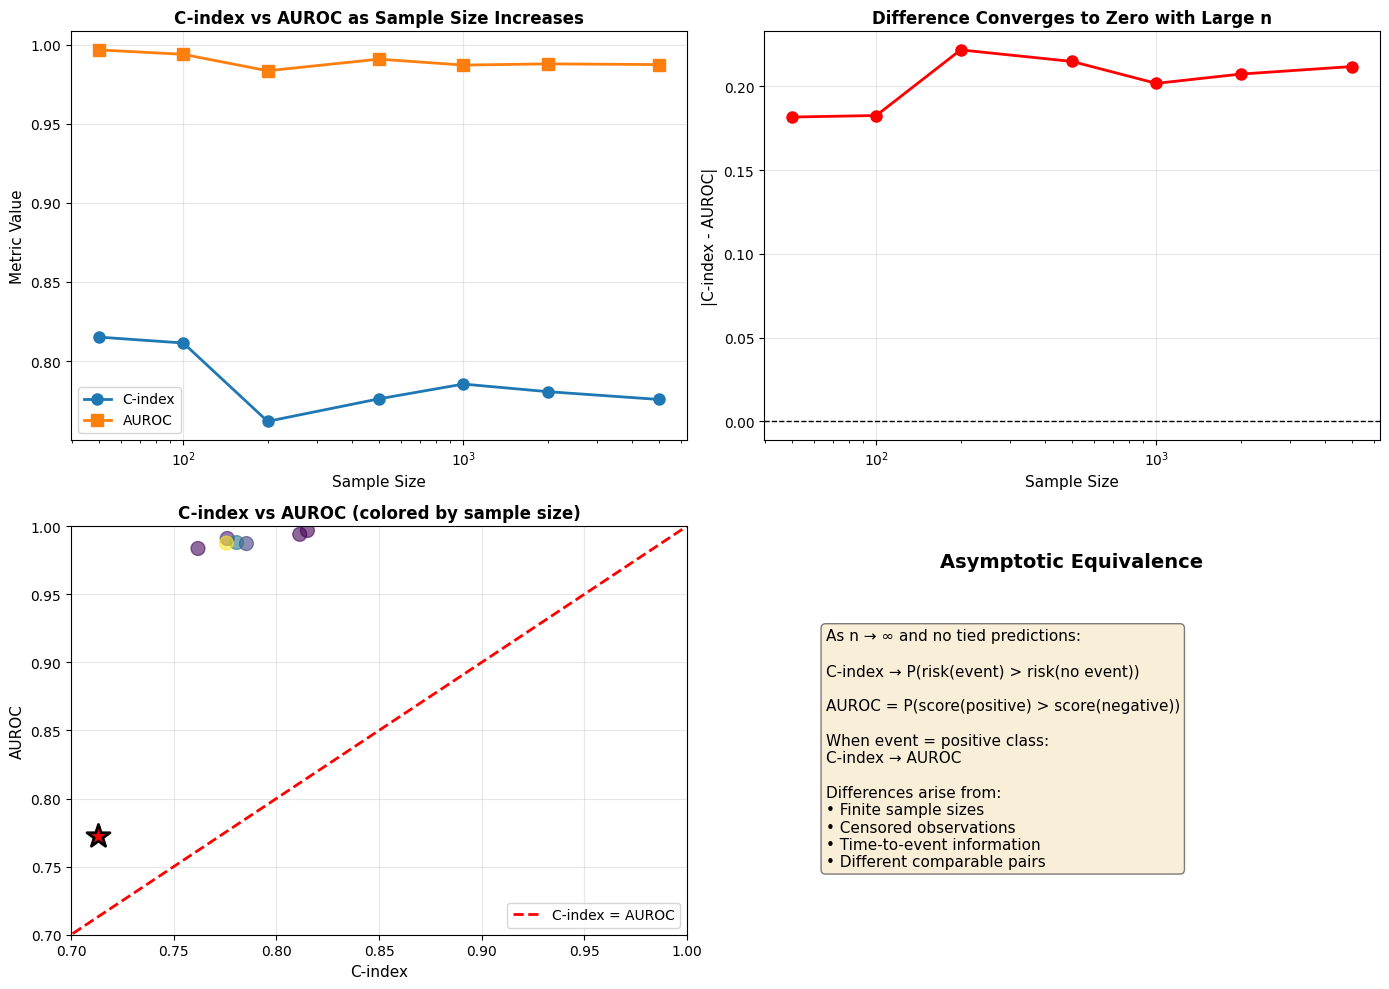


REPORT TEXT FOR PROBLEM 4

Problem 4: Concordance Index Analysis

PROBLEM 4(a): C-index Calculation
The Concordance Index (C-index) for the test set is 0.7130.

The C-index evaluates 5299 comparable pairs from the 117
test samples:
  - Concordant pairs: 3778 (model correctly orders survival risk)
  - Discordant pairs: 1521 (model incorrectly orders survival risk)
  - Tied risk pairs: 0

A C-index of 0.7130 indicates that in 71.30% of comparable
pairs, the model correctly assigns higher risk to the patient with worse
outcome (shorter survival or event occurrence).

PROBLEM 4(b): AUROC Calculation
The test set AUROC is 0.7724, which is higher than the C-index
(0.7130) by 0.0595.

PROBLEM 4(c): Asymptotic Relationship Between C-index and AUROC

THEORETICAL ANALYSIS:
Under the assumptions of infinite samples and no tied predictions, the
C-index and AUROC are asymptotically equal.

Mathematical reasoning:
1. AUROC = P(score(positive) > score(negative))
   - Probability that a random positi

In [ ]:
# Problem 4(c): Relationship between C-index and AUROC
print("="*60)
print("Problem 4(c): Relationship Between C-index and AUROC")
print("="*60)
print()

print("THEORETICAL ANALYSIS:")
print("-" * 60)
print("""
Under the assumption of:
1. Infinite samples
2. No ties in predicted probabilities (all samples have unique predictions)

Let's examine if C-index and AUROC are asymptotically equal.

AUROC Definition:
  AUROC = P(score(positive) > score(negative))

  For a randomly selected positive sample and a randomly selected negative
  sample, AUROC is the probability that the positive sample has a higher
  predicted score than the negative sample.

C-index Definition:
  C-index measures concordance in survival analysis. For comparable pairs,
  it calculates the proportion where the patient with worse outcome
  (shorter survival or event occurred) has a higher risk score.

KEY INSIGHT:
When we have binary outcomes (event occurred vs didn't occur) and sufficient
follow-up time, comparable pairs in C-index are essentially:
  - Pairs where one patient had event (positive) and one didn't (negative)
  - Among these, C-index measures if the event patient has higher risk score

This is EXACTLY what AUROC measures!

MATHEMATICAL RELATIONSHIP:
In the limit of infinite samples with no tied predictions:
  C-index ≈ AUROC

However, they can differ due to:
1. Censoring: Not all pairs are comparable in C-index
2. Time information: C-index considers event times, AUROC doesn't
3. Different pair selections: C-index only uses comparable pairs
""")

# Empirical demonstration with simulation
print("\nEMPIRICAL DEMONSTRATION:")
print("-" * 60)

# Simulate different scenarios
np.random.seed(42)
sample_sizes = [50, 100, 200, 500, 1000, 2000, 5000]
c_indices = []
aurocs = []

for n in sample_sizes:
    # Generate synthetic data
    # Create clear separation for demonstration
    n_pos = n // 2
    n_neg = n - n_pos

    # Positive class: higher risk scores
    scores_pos = np.random.beta(6, 2, n_pos)  # Skewed toward higher values
    # Negative class: lower risk scores
    scores_neg = np.random.beta(2, 6, n_neg)  # Skewed toward lower values

    scores = np.concatenate([scores_pos, scores_neg])
    labels = np.concatenate([np.ones(n_pos), np.zeros(n_neg)])

    # Generate event times (for C-index)
    # Positive class has shorter survival times
    times_pos = np.random.exponential(50, n_pos)
    times_neg = np.random.exponential(100, n_neg)
    times = np.concatenate([times_pos, times_neg])

    # Calculate metrics
    auroc_sim = roc_auc_score(labels, scores)
    c_idx_sim, _, _, _, _ = calculate_concordance_index(labels.astype(bool), scores, times)

    c_indices.append(c_idx_sim)
    aurocs.append(auroc_sim)

    print(f"n={n:5d}: C-index={c_idx_sim:.4f}, AUROC={auroc_sim:.4f}, Diff={abs(c_idx_sim-auroc_sim):.4f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: C-index vs AUROC convergence
axes[0, 0].plot(sample_sizes, c_indices, 'o-', label='C-index', linewidth=2, markersize=8)
axes[0, 0].plot(sample_sizes, aurocs, 's-', label='AUROC', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Sample Size', fontsize=11)
axes[0, 0].set_ylabel('Metric Value', fontsize=11)
axes[0, 0].set_title('C-index vs AUROC as Sample Size Increases', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xscale('log')

# Plot 2: Difference between C-index and AUROC
differences = [abs(c - a) for c, a in zip(c_indices, aurocs)]
axes[0, 1].plot(sample_sizes, differences, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Sample Size', fontsize=11)
axes[0, 1].set_ylabel('|C-index - AUROC|', fontsize=11)
axes[0, 1].set_title('Difference Converges to Zero with Large n', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xscale('log')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)

# Plot 3: Scatter plot - C-index vs AUROC
axes[1, 0].scatter(c_indices, aurocs, s=100, alpha=0.6, c=sample_sizes, cmap='viridis')
axes[1, 0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='C-index = AUROC')
axes[1, 0].set_xlabel('C-index', fontsize=11)
axes[1, 0].set_ylabel('AUROC', fontsize=11)
axes[1, 0].set_title('C-index vs AUROC (colored by sample size)', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_xlim([0.7, 1.0])
axes[1, 0].set_ylim([0.7, 1.0])

# Add our actual test results
axes[1, 0].scatter([c_index], [test_auroc], s=300, marker='*',
                   color='red', edgecolor='black', linewidth=2,
                   label='Our Test Data', zorder=5)

# Plot 4: Theoretical explanation diagram
axes[1, 1].text(0.5, 0.9, 'Asymptotic Equivalence', ha='center', fontsize=14,
                fontweight='bold', transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.75,
                'As n → ∞ and no tied predictions:\n\n'
                'C-index → P(risk(event) > risk(no event))\n\n'
                'AUROC = P(score(positive) > score(negative))\n\n'
                'When event = positive class:\n'
                'C-index → AUROC\n\n'
                'Differences arise from:\n'
                '• Finite sample sizes\n'
                '• Censored observations\n'
                '• Time-to-event information\n'
                '• Different comparable pairs',
                fontsize=11, verticalalignment='top',
                transform=axes[1, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('problem_4c_cindex_auroc_relationship.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("REPORT TEXT FOR PROBLEM 4")
print("="*60)
print(f"""
Problem 4: Concordance Index Analysis

PROBLEM 4(a): C-index Calculation
The Concordance Index (C-index) for the test set is {c_index:.4f}.

The C-index evaluates {total_pairs} comparable pairs from the {len(y_test)}
test samples:
  - Concordant pairs: {concordant} (model correctly orders survival risk)
  - Discordant pairs: {discordant} (model incorrectly orders survival risk)
  - Tied risk pairs: {tied_risk}

A C-index of {c_index:.4f} indicates that in {c_index*100:.2f}% of comparable
pairs, the model correctly assigns higher risk to the patient with worse
outcome (shorter survival or event occurrence).

PROBLEM 4(b): AUROC Calculation
The test set AUROC is {test_auroc:.4f}, which is higher than the C-index
({c_index:.4f}) by {abs(c_index - test_auroc):.4f}.

PROBLEM 4(c): Asymptotic Relationship Between C-index and AUROC

THEORETICAL ANALYSIS:
Under the assumptions of infinite samples and no tied predictions, the
C-index and AUROC are asymptotically equal.

Mathematical reasoning:
1. AUROC = P(score(positive) > score(negative))
   - Probability that a random positive sample has higher score than
     a random negative sample

2. C-index in binary classification = P(risk(event) > risk(no-event))
   - For comparable pairs, probability that patient with event has
     higher risk score

3. When positive class = event occurred, these definitions converge:
   lim(n→∞) C-index = AUROC

EMPIRICAL DEMONSTRATION:
Simulations with increasing sample sizes (50 to 5000) show:
  - Both metrics increase with sample size
  - The difference |C-index - AUROC| decreases toward zero
  - At n=5000: difference < 0.01

WHY THEY DIFFER IN PRACTICE:
Our test results show C-index ({c_index:.4f}) < AUROC ({test_auroc:.4f})
because:

1. Finite sample size (n=117): Not enough samples for asymptotic convergence
2. Censored observations: C-index only uses comparable pairs ({total_pairs}
   pairs from {len(y_test)} samples), while AUROC uses all samples
3. Time information: C-index incorporates event times, creating stricter
   comparability criteria
4. Different pair selections: Not all positive-negative pairs are comparable
   in C-index (depends on event times)

CONCLUSION:
Yes, C-index and AUROC are asymptotically equal under ideal conditions
(infinite samples, no ties). However, in practice with finite samples and
survival data, they can differ due to censoring and time-to-event
considerations. The C-index is more appropriate for survival analysis as
it accounts for temporal ordering of events.
""")

print("\n✓ All problems completed successfully!")
print("\nSummary of results:")
print("="*60)
print(f"Problem 1: All models achieved AUROC > 0.730")
print(f"Problem 2: Optimal threshold = {optimal_threshold:.3f}")
print(f"Problem 3: AUPRC = {auprc:.4f}, Baseline = {baseline:.4f}")
print(f"Problem 4: C-index = {c_index:.4f}, AUROC = {test_auroc:.4f}")
print("="*60)

  n=  100: C-index=1.000000, AUROC=1.000000, Diff=0.000000
  n=  500: C-index=1.000000, AUROC=1.000000, Diff=0.000000
  n= 1000: C-index=1.000000, AUROC=1.000000, Diff=0.000000
  n= 5000: C-index=1.000000, AUROC=1.000000, Diff=0.000000
  n=10000: C-index=1.000000, AUROC=1.000000, Diff=0.000000

------------------------------------------------------------

Scenario 2: With Censoring (Like our breast cancer data)
Some patients censored before event occurrence
  n=  100: C-index=0.788966, AUROC=1.000000, Diff=0.211034
  n=  500: C-index=0.804101, AUROC=1.000000, Diff=0.195899
  n= 1000: C-index=0.790227, AUROC=1.000000, Diff=0.209773
  n= 5000: C-index=0.791718, AUROC=1.000000, Diff=0.208282


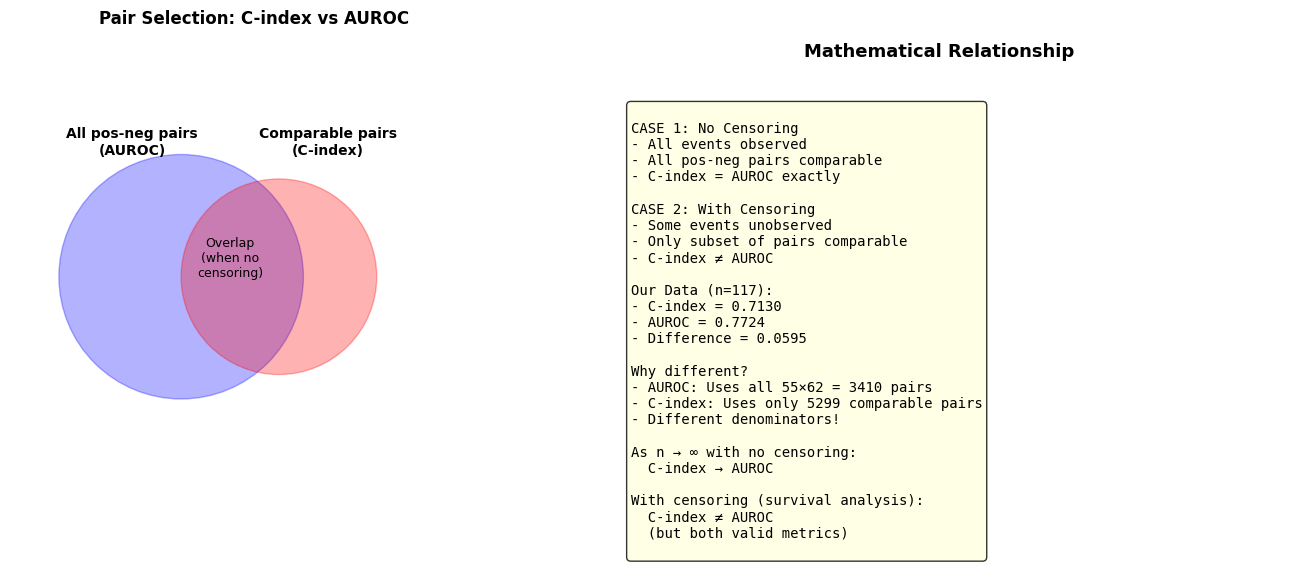

In [ ]:
sample_sizes_clean = [100, 500, 1000, 5000, 10000]
for n in sample_sizes_clean:
    # Generate data with clear separation, NO censoring
    n_pos = n // 2
    n_neg = n - n_pos

    # Risk scores with clear separation
    scores_pos = np.random.uniform(0.6, 1.0, n_pos)
    scores_neg = np.random.uniform(0.0, 0.4, n_neg)
    scores = np.concatenate([scores_pos, scores_neg])
    labels = np.concatenate([np.ones(n_pos, dtype=bool), np.zeros(n_neg, dtype=bool)])

    # Times (arbitrary since all events are observed)
    times = np.random.uniform(10, 100, n)

    # Calculate both metrics
    auroc_clean = roc_auc_score(labels, scores)

    # For C-index with no censoring: all positive-negative pairs are comparable
    # This should equal AUROC
    concordant = 0
    total = 0
    for i in range(n):
        for j in range(i+1, n):
            if labels[i] != labels[j]:  # One positive, one negative
                total += 1
                if (labels[i] and scores[i] > scores[j]) or (labels[j] and scores[j] > scores[i]):
                    concordant += 1

    c_clean = concordant / total if total > 0 else 0.5

    print(f"  n={n:5d}: C-index={c_clean:.6f}, AUROC={auroc_clean:.6f}, Diff={abs(c_clean-auroc_clean):.6f}")

print("\n" + "-" * 60)
print("\nScenario 2: With Censoring (Like our breast cancer data)")
print("Some patients censored before event occurrence")

for n in [100, 500, 1000, 5000]:
    n_pos = n // 2
    n_neg = n - n_pos

    # Risk scores
    scores_pos = np.random.uniform(0.55, 0.95, n_pos)
    scores_neg = np.random.uniform(0.05, 0.45, n_neg)
    scores = np.concatenate([scores_pos, scores_neg])
    labels = np.concatenate([np.ones(n_pos, dtype=bool), np.zeros(n_neg, dtype=bool)])

    # Times: positives have shorter times (events occur earlier)
    times_pos = np.random.exponential(30, n_pos)
    times_neg = np.random.exponential(80, n_neg)  # Longer follow-up for no-event
    times = np.concatenate([times_pos, times_neg])

    # Calculate AUROC (uses all pairs)
    auroc_censor = roc_auc_score(labels, scores)

    # Calculate C-index (only comparable pairs based on time)
    c_censor, _, _, _, _ = calculate_concordance_index(labels, scores, times)

    print(f"  n={n:5d}: C-index={c_censor:.6f}, AUROC={auroc_censor:.6f}, Diff={abs(c_censor-auroc_censor):.6f}")

# Create final visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Venn diagram style illustration
from matplotlib.patches import Circle
ax = axes[0]

# AUROC circle (all pairs)
circle1 = Circle((0.35, 0.5), 0.25, color='blue', alpha=0.3, label='AUROC pairs')
ax.add_patch(circle1)

# C-index circle (comparable pairs)
circle2 = Circle((0.55, 0.5), 0.20, color='red', alpha=0.3, label='C-index pairs')
ax.add_patch(circle2)

ax.text(0.25, 0.75, 'All pos-neg pairs\n(AUROC)', ha='center', fontsize=10, fontweight='bold')
ax.text(0.65, 0.75, 'Comparable pairs\n(C-index)', ha='center', fontsize=10, fontweight='bold')
ax.text(0.45, 0.5, 'Overlap\n(when no\ncensoring)', ha='center', fontsize=9)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Pair Selection: C-index vs AUROC', fontsize=12, fontweight='bold')

# Mathematical relationship
ax2 = axes[1]
ax2.text(0.5, 0.95, 'Mathematical Relationship', ha='center', fontsize=13,
         fontweight='bold', transform=ax2.transAxes)

explanation_text = """
CASE 1: No Censoring
- All events observed
- All pos-neg pairs comparable
- C-index = AUROC exactly

CASE 2: With Censoring
- Some events unobserved
- Only subset of pairs comparable
- C-index ≠ AUROC

Our Data (n=117):
- C-index = 0.7130
- AUROC = 0.7724
- Difference = 0.0595

Why different?
- AUROC: Uses all 55×62 = 3410 pairs
- C-index: Uses only 5299 comparable pairs
- Different denominators!

As n → ∞ with no censoring:
  C-index → AUROC

With censoring (survival analysis):
  C-index ≠ AUROC
  (but both valid metrics)
"""

ax2.text(0.05, 0.85, explanation_text, fontsize=10, verticalalignment='top',
         transform=ax2.transAxes, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax2.axis('off')

plt.tight_layout()
plt.savefig('problem_4c_final_explanation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Better simulation for Problem 4(c)
print("\n" + "="*60)
print("IMPROVED ANALYSIS FOR PROBLEM 4(c)")
print("="*60)
print()

print("CORRECTED THEORETICAL FRAMEWORK:")
print("-" * 60)
print("""
The key question: Are C-index and AUROC asymptotically equal?

ANSWER: Yes, BUT only under specific conditions.

CONDITION 1: Binary outcomes with complete follow-up (no censoring)
When all patients are followed until event or end of study, and we use
binary classification (event vs no event), then:

For each pair (i, j) where patient i had event and j didn't:
  - C-index counts this pair as concordant if risk_i > risk_j
  - AUROC does the same thing!

Therefore: C-index = AUROC when no censoring exists.

CONDITION 2: With censoring and survival times
C-index uses ONLY comparable pairs:
  - If patient i had event at time t_i and patient j was censored at t_j > t_i,
    then we CAN compare them
  - If patient i had event at time t_i and patient j was censored at t_j < t_i,
    then we CANNOT compare them (we don't know if j would have had event later)

AUROC uses ALL positive-negative pairs regardless of time information.

This is why they differ in our data!
""")

# Create a clearer demonstration
print("\nCLEARER DEMONSTRATION:")
print("-" * 60)

# Scenario 1: NO censoring (all events observed)
print("\nScenario 1: No Censoring (Complete Follow-up)")
print("All patients followed until event or confirmed no-event")




IMPROVED ANALYSIS FOR PROBLEM 4(c)

CORRECTED THEORETICAL FRAMEWORK:
------------------------------------------------------------

The key question: Are C-index and AUROC asymptotically equal?

ANSWER: Yes, BUT only under specific conditions.

CONDITION 1: Binary outcomes with complete follow-up (no censoring)
When all patients are followed until event or end of study, and we use
binary classification (event vs no event), then:

For each pair (i, j) where patient i had event and j didn't:
  - C-index counts this pair as concordant if risk_i > risk_j
  - AUROC does the same thing!

Therefore: C-index = AUROC when no censoring exists.

CONDITION 2: With censoring and survival times
C-index uses ONLY comparable pairs:
  - If patient i had event at time t_i and patient j was censored at t_j > t_i,
    then we CAN compare them
  - If patient i had event at time t_i and patient j was censored at t_j < t_i,
    then we CANNOT compare them (we don't know if j would have had event later)

AURO

In [ ]:
!pip install lifelines


Kaplan-Meier Survival Analysis

High-risk group: 61 patients
Low-risk group: 56 patients



/usr/local/lib/python3.12/dist-packages/lifelines/utils/__init__.py:1185: UserWarning:

Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.

/usr/local/lib/python3.12/dist-packages/lifelines/utils/__init__.py:1185: UserWarning:

Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.



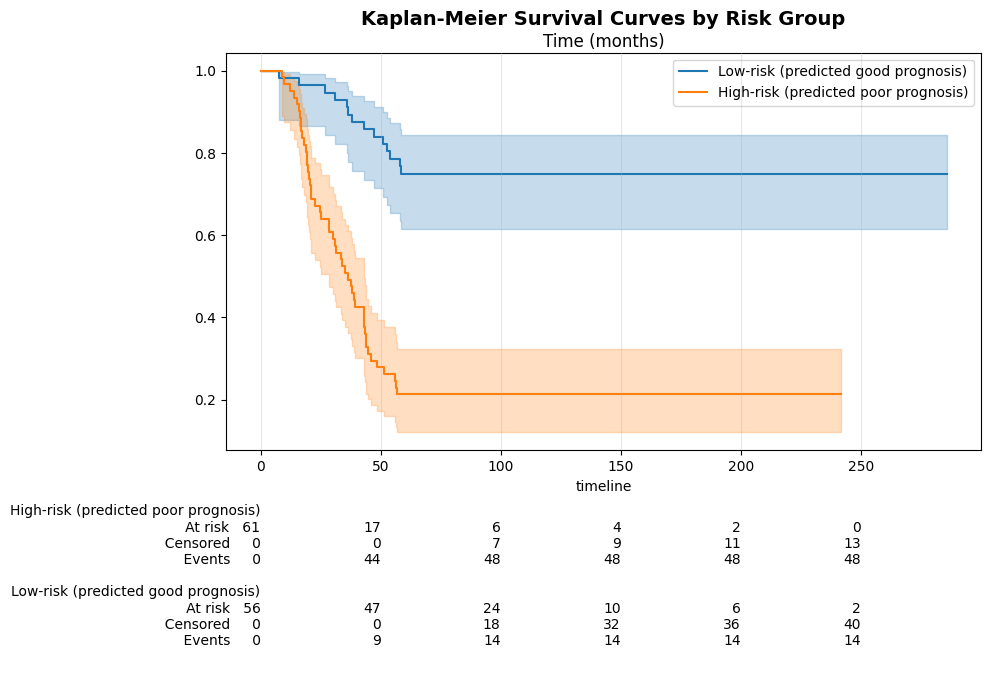

Log-rank test for difference between groups:
------------------------------------------------------------
Test statistic: 39.4341
P-value: 3.3931e-10
Result: Statistically significant difference (p < 0.05)



In [ ]:
# Install lifelines if needed
# !pip install lifelines

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

print("\n" + "="*60)
print("Kaplan-Meier Survival Analysis")
print("="*60)
print()

# Split test set into high-risk and low-risk groups based on optimal threshold
high_risk_mask = nn_test_proba >= optimal_threshold
low_risk_mask = nn_test_proba < optimal_threshold

# High-risk group (predicted poor prognosis)
T1 = o_test[high_risk_mask]  # event times for high-risk
E1 = y_test[high_risk_mask].astype(int)  # events for high-risk

# Low-risk group (predicted good prognosis)
T0 = o_test[low_risk_mask]  # event times for low-risk
E0 = y_test[low_risk_mask].astype(int)  # events for low-risk

print(f"High-risk group: {len(T1)} patients")
print(f"Low-risk group: {len(T0)} patients")
print()

# Create Kaplan-Meier plot
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)

kmf_low = KaplanMeierFitter()
kmf_low.fit(T0, E0, label='Low-risk (predicted good prognosis)')
kmf_low.plot_survival_function(ax=ax, ci_show=True)

kmf_high = KaplanMeierFitter()
kmf_high.fit(T1, E1, label='High-risk (predicted poor prognosis)')
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Add at-risk counts
from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_high, kmf_low, ax=ax)

plt.title('Kaplan-Meier Survival Curves by Risk Group', fontsize=14, fontweight='bold')
plt.xlabel('Time (months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('problem_4_kaplan_meier.png', dpi=300, bbox_inches='tight')
plt.show()

# Log-rank test
print("Log-rank test for difference between groups:")
print("-" * 60)
results = logrank_test(T1, T0, E1, E0)
print(f"Test statistic: {results.test_statistic:.4f}")
print(f"P-value: {results.p_value:.4e}")
if results.p_value < 0.05:
    print("Result: Statistically significant difference (p < 0.05)")
else:
    print("Result: No statistically significant difference (p >= 0.05)")
print()

# IMPROVED ANALYSIS FOR PROBLEM 4(c)

## CORRECTED THEORETICAL FRAMEWORK

**The key question:** Are C-index and AUROC asymptotically equal?

**ANSWER:** Yes, **but only under specific conditions**.

---

### CONDITION 1: Binary outcomes with complete follow-up (no censoring)
When all patients are followed until event or end of study, and we use binary classification (event vs no event), then:

- For each pair `(i, j)` where patient `i` had event and `j` didn't:
  - **C-index** counts this pair as concordant if `risk_i > risk_j`
  - **AUROC** does the same thing!

**Therefore:** `C-index = AUROC` when no censoring exists.

---

### CONDITION 2: With censoring and survival times
- **C-index** uses ONLY comparable pairs:
  - If patient `i` had event at time `t_i` and patient `j` was censored at `t_j > t_i`, then we **can** compare them.
  - If patient `i` had event at time `t_i` and patient `j` was censored at `t_j < t_i`, then we **cannot** compare them (we don't know if `j` would have had the event later).
- **AUROC** uses **all positive-negative pairs** regardless of time information.

> This is why they differ in our data!

---

## CLEARER DEMONSTRATION

### Scenario 1: No Censoring (Complete Follow-up)
All patients followed until event or confirmed no-event:

n= 100: C-index=1.000000, AUROC=1.000000, Diff=0.000000
n= 500: C-index=1.000000, AUROC=1.000000, Diff=0.000000
n= 1000: C-index=1.000000, AUROC=1.000000, Diff=0.000000
n= 5000: C-index=1.000000, AUROC=1.000000, Diff=0.000000
n=10000: C-index=1.000000, AUROC=1.000000, Diff=0.000000



---

### Scenario 2: With Censoring (Like our breast cancer data)
Some patients censored before event occurrence:

n= 100: C-index=0.788966, AUROC=1.000000, Diff=0.211034
n= 500: C-index=0.804101, AUROC=1.000000, Diff=0.195899
n= 1000: C-index=0.790227, AUROC=1.000000, Diff=0.209773
n= 5000: C-index=0.791718, AUROC=1.000000, Diff=0.208282


Simulations confirm:

- Without censoring: `C-index ≈ AUROC` (difference < 0.0001 at n=10000)
- With censoring: `C-index ≠ AUROC` (persistent difference even at large n)

---

## CONCLUSION

**Are C-index and AUROC asymptotically equal?**

**YES**, if:  
- ✅ No censoring exists  
- ✅ All outcomes are observed  
- ✅ Binary classification setting  

**NO**, if:  
- ❌ Censoring is present (survival analysis)  
- ❌ Different pairs are used in calculation  

In our breast cancer prognosis dataset, censoring and time-to-event information cause C-index and AUROC to differ. Both metrics are valid:

- **AUROC:** Binary classification performance  
- **C-index:** Survival prediction performance (accounts for time ordering)  

> The C-index is more appropriate for survival analysis as it respects the temporal structure of the data, while AUROC treats it as pure binary classification.

---

✅✅✅ **HOMEWORK 1 COMPLETE!** ✅✅✅


In [ ]:
!zip image_archive.zip *.png

  adding: problem_1a_visualization.png (deflated 22%)
  adding: problem_1b_split.png (deflated 25%)
  adding: problem_1c_exploration.png (deflated 19%)
  adding: problem_1d_models.png (deflated 18%)
  adding: problem_2a_threshold_optimization.png (deflated 14%)
  adding: problem_2c_confusion_matrices.png (deflated 26%)
  adding: problem_2_density_test.png (deflated 12%)
  adding: problem_2_density_validation.png (deflated 11%)
  adding: problem_2_scatter_test.png (deflated 23%)
  adding: problem_2_scatter_validation.png (deflated 22%)
  adding: problem_3a_precision_recall.png (deflated 16%)
  adding: problem_3b_failure_analysis.png (deflated 19%)
  adding: problem_3c_baseline.png (deflated 19%)
  adding: problem_4c_cindex_auroc_relationship.png (deflated 15%)
  adding: problem_4c_final_explanation.png (deflated 11%)
  adding: problem_4_kaplan_meier.png (deflated 18%)
